# Heart Disease Prediction

Во овој проект го користам датасетот од Kaggle -https://www.kaggle.com/cherngs/heart-disease-cleveland-uci?select=heart_cleveland_upload.csv.
Ќе користиме различни методи и алгоритми од машинско учење со цел да предвидиме дали дадена личност страда од заболување на срцето.

### Вчитување на потребни датотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Вчитување на датасет и негово разгледување со цел донесување на заклучоци

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age          297 non-null int64
sex          297 non-null int64
cp           297 non-null int64
trestbps     297 non-null int64
chol         297 non-null int64
fbs          297 non-null int64
restecg      297 non-null int64
thalach      297 non-null int64
exang        297 non-null int64
oldpeak      297 non-null float64
slope        297 non-null int64
ca           297 non-null int64
thal         297 non-null int64
condition    297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Statstical Details Describe ни дава статистики податоци во нумерички формат. Од табелата можеме да забелижиме дека максималната возраст е 77 години, а минималната е 29 години, а средната е 54.5 години. Податоците се поделени на 3 квартили или 4 подеднакви делови, по 25% од податоците лежат во секоја група. Стадардната девијација и средната вредност ни даваат идеа за централната тенденција на датасетот, со тоа што средната вредност е под влијание на outliers.

#### Објаснување на 13 - те карактеристики (features)

Разгледуваме 13 карактеристики:

* age: возраст изразена во години
* sex: пол (1 = машко; 0 = женско)
* cp: тип на болка во гради
 -- Вредност 0: типична ангина
 -- Вредност 1: атипична ангина
 -- Вредност 2: не-ангинална болка
 -- Вредност 3: асимптоматски
* trestbps: нормален крвен притисок (in mm Hg on admission to the hospital)
* chol: холестрерол во 0.01kg / m^3 
* fbs: ниво на шеќер во крвта (при постење):120 mg/dl (1 = да ;0 = не)
* restecg: ЕКГ резултати при физичко мирување
** -- Вредност 0: Нормални резултати 
** -- Вредност 1: абнормалности на ST-T сегментот на ЕКГ сигналот (T wave inversions and/or ST elevation or depression of > 0.05 mV)
** -- Вредност 2: најверојатна или дефинитивна вертикуларна хипертрофија на левата комора на срцето според Естес критериум. (Рomhilt-Estes LVH Point Score System: If the score equals 4, LVH is present with 30% to 54% sensitivity. If the score is greater than 5, LVH is present with 83% to 97% specificity.)
* thalach: наголем број на срцеви отчувања измерени (максимален пулс)
* exang: срцева ангина предизвикана од физичка активност (1 = да; 0 = не)
* oldpeak = СТ-депресија предизвикана од физичка активност во релација со истата при одмарање
st dpression se odnesuva na toa koga pri pravenje na ecg, vo ST segmentot se dobivaat signali koi se pod normalnite granici.
(ako vrema vrednost najmalce 2 ili nad 2 pri pravenje na stres test togash idicira reversible ischaemia)
* slope: наклон на пикот на СТ сегменотот од ЕКГ сигналот
** -- Вредност 0: растечки 
** -- Вредност 1: константен
** -- Вредност 2: опаѓачки
* ca: број на главни крвни садови (0-3) обоени при флуроскопија
* thal: Бета таласемија - наследно нарушување на крвта 0 = normal; 1 = fixed defect; 2 = reversable defect 0 = Thalassemia minor;? 1 = Thalassemia intermedia?; 2 = Thalassemia major;? 
* срцево заболување: 0 = нема заболување, 1 = има заболување

In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age          297 non-null int64
sex          297 non-null int64
cp           297 non-null int64
trestbps     297 non-null int64
chol         297 non-null int64
fbs          297 non-null int64
restecg      297 non-null int64
thalach      297 non-null int64
exang        297 non-null int64
oldpeak      297 non-null float64
slope        297 non-null int64
ca           297 non-null int64
thal         297 non-null int64
condition    297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 32.5 KB
None


Забележуваме дека во датасетот нема податоци за кои имаме вредност 0.
Затоа нема потреба од исфрлање на податоци или пополнување на вредностите кои недостасуваат

### Барање на зависност помеѓу атрибутите

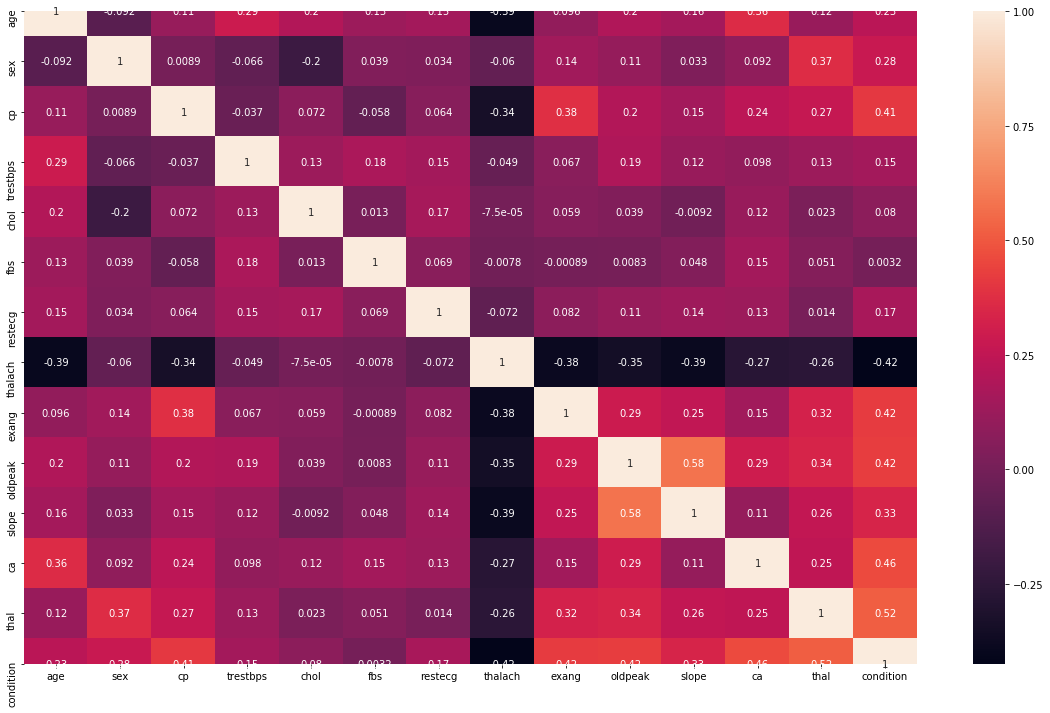

In [7]:
import seaborn as sns
plt.figure(figsize=(20,12))
g=sns.heatmap(df.corr(),annot=True)

Од мапата можеме на забележиме кои карактеристики (features) како влијаат врз појавата на срцево заболување. Доколку ја гледаме последната колона од мапата, забележуваме дека сите карактеристики имаат позитивни коефициенти на зависност освен максималниот пулс (thalach) кој има негативен коефициент. Тоа значи дека постоењето на срцево заболување односно таргетот (condition) зависи прапорционално од сите карактеристики, освен од thalach од кој зависи обратнопропрционално. Најголем коефициент има бета таласемија (thal) - 0.52, а најмал шеќер во крвта при постење (fbs) - 0.0032

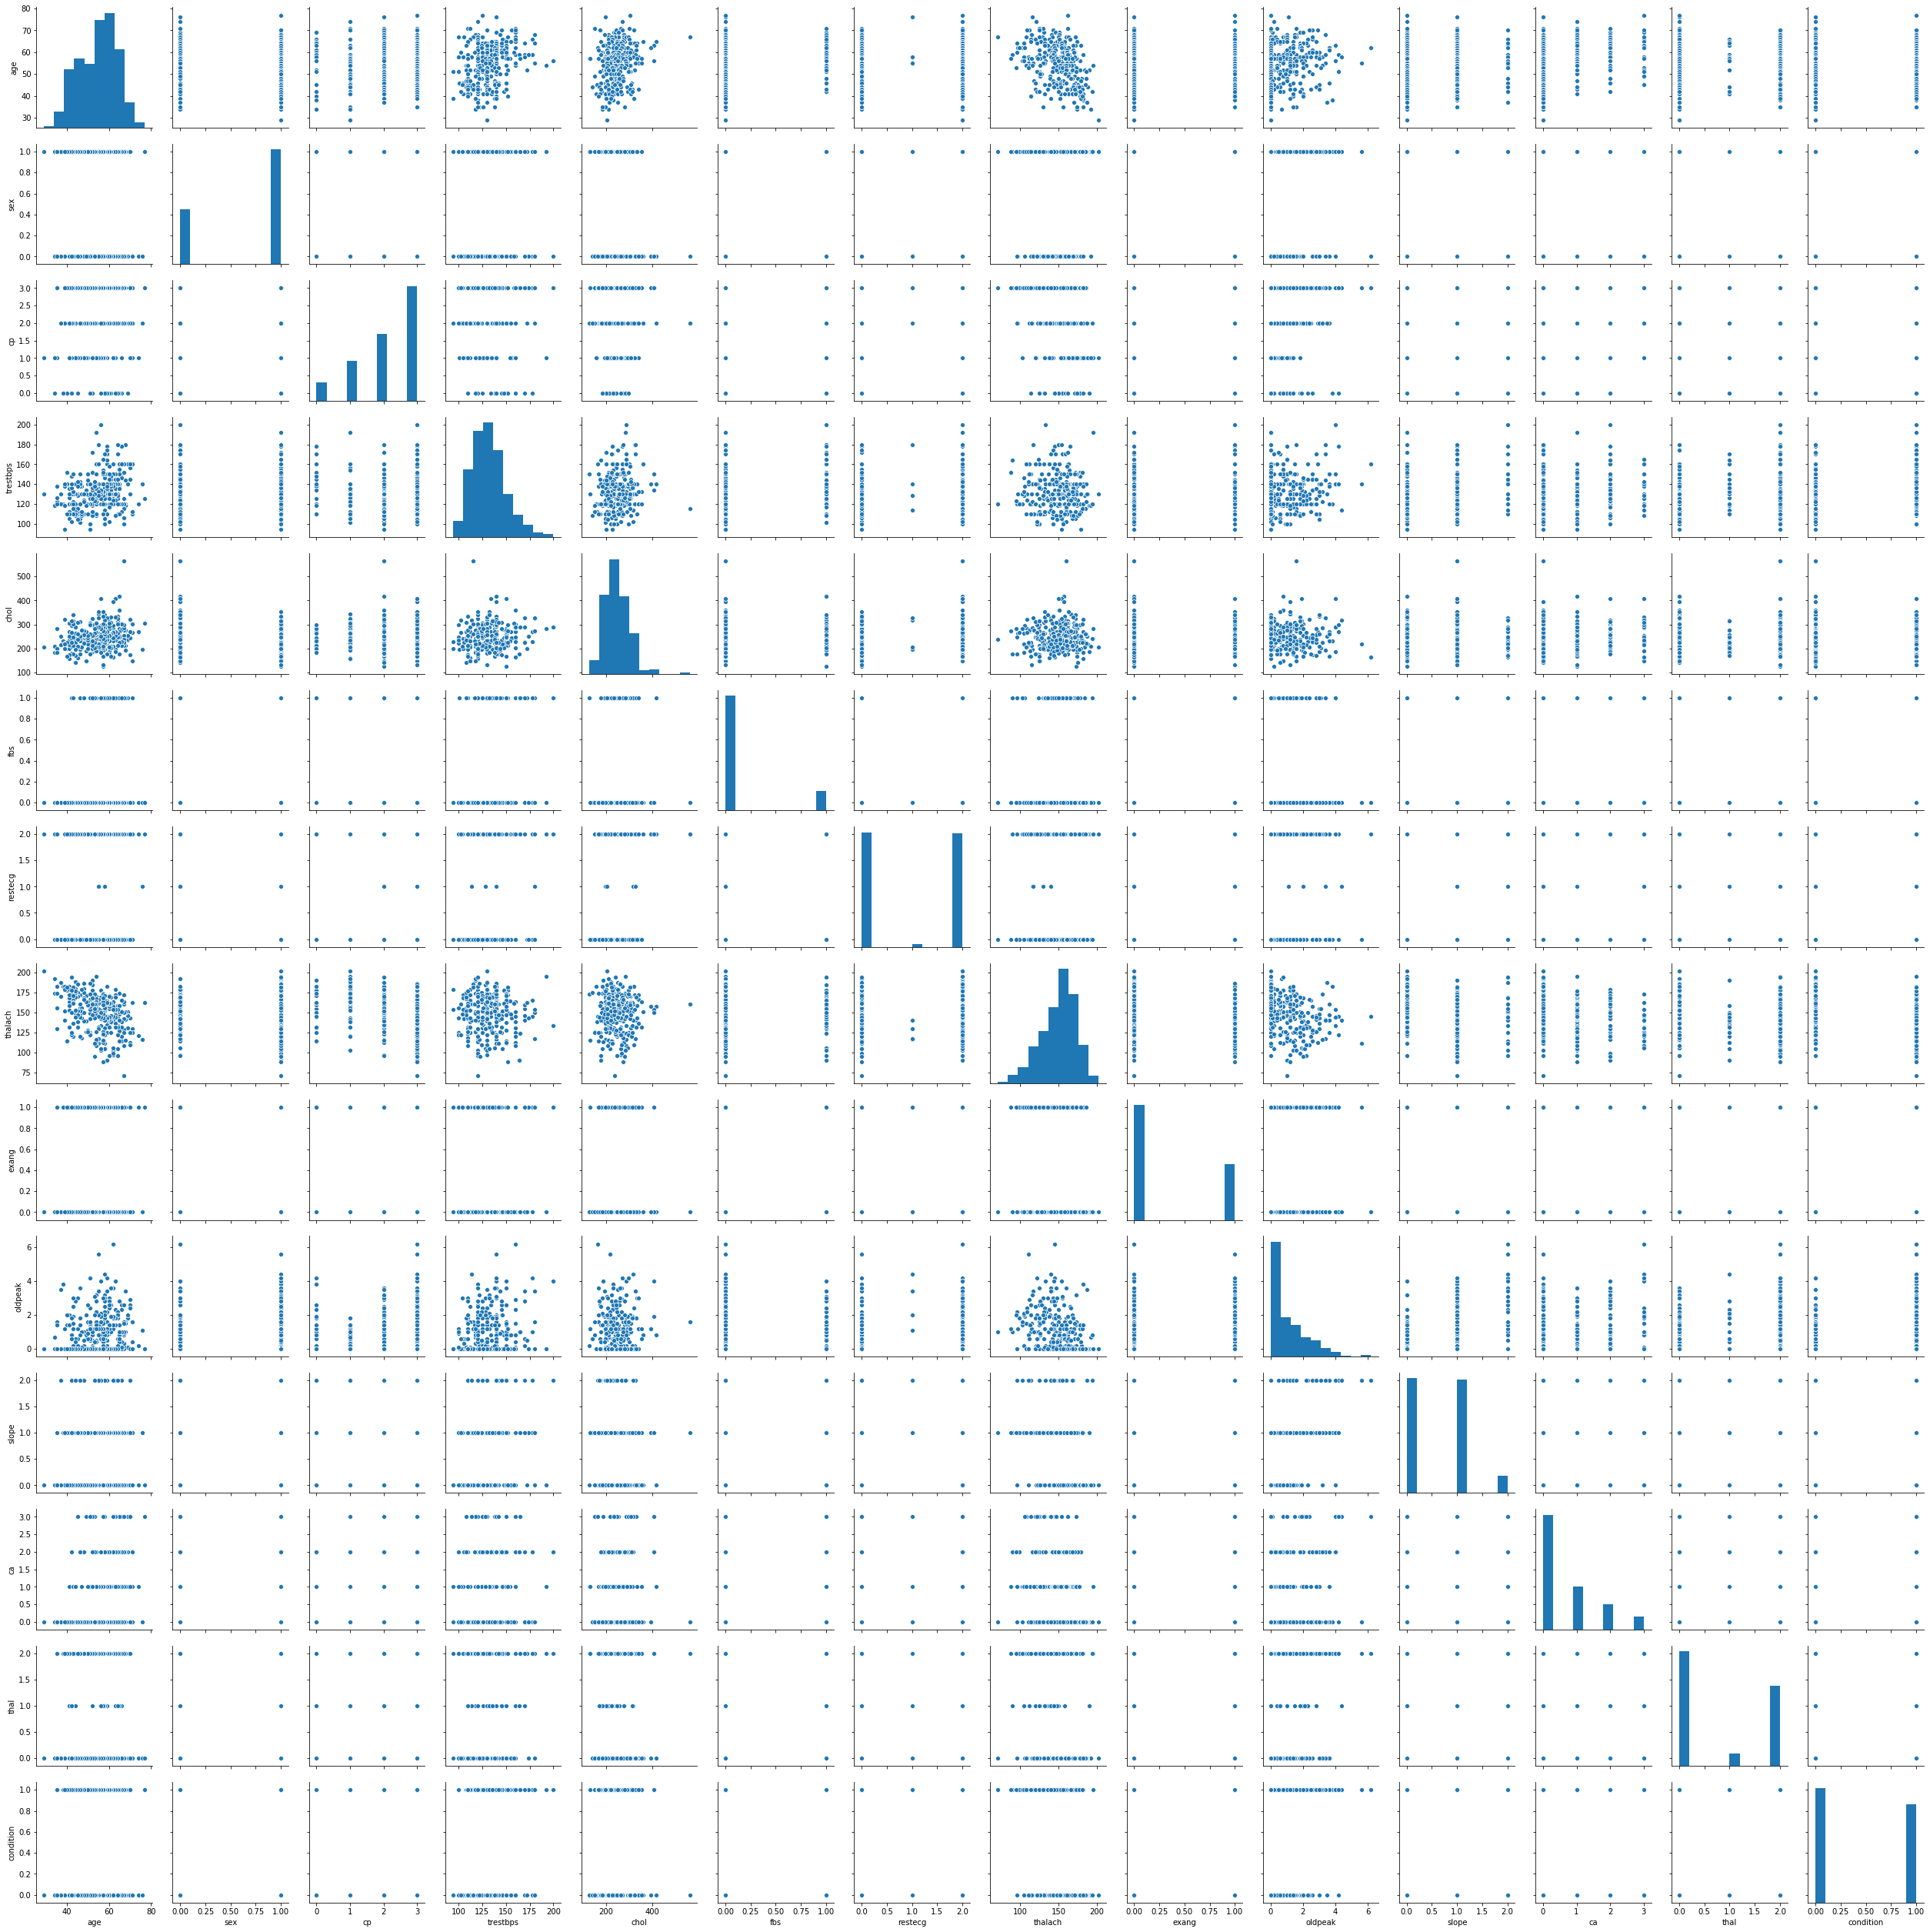

In [8]:
sns.pairplot(data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13129FB0>,
      dtype=object)

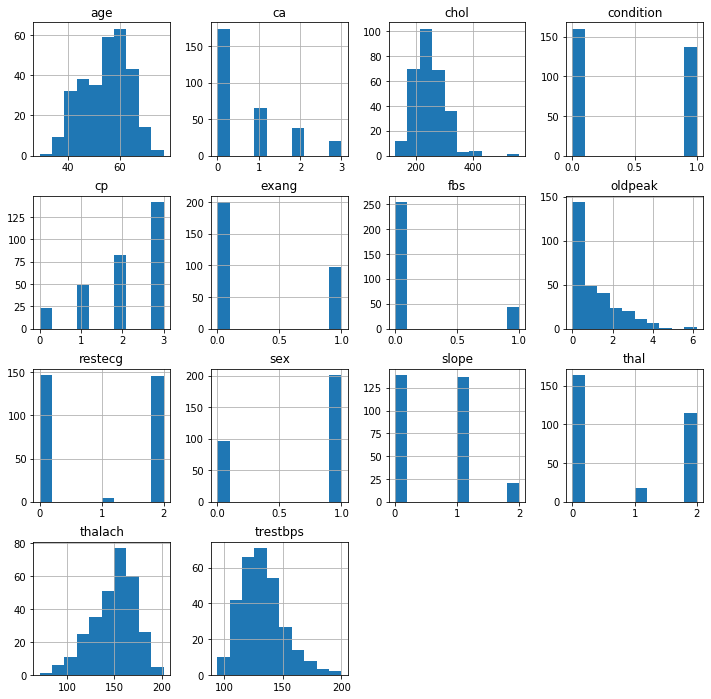

In [9]:
df.hist(figsize=(12,12), layout=(4,4))

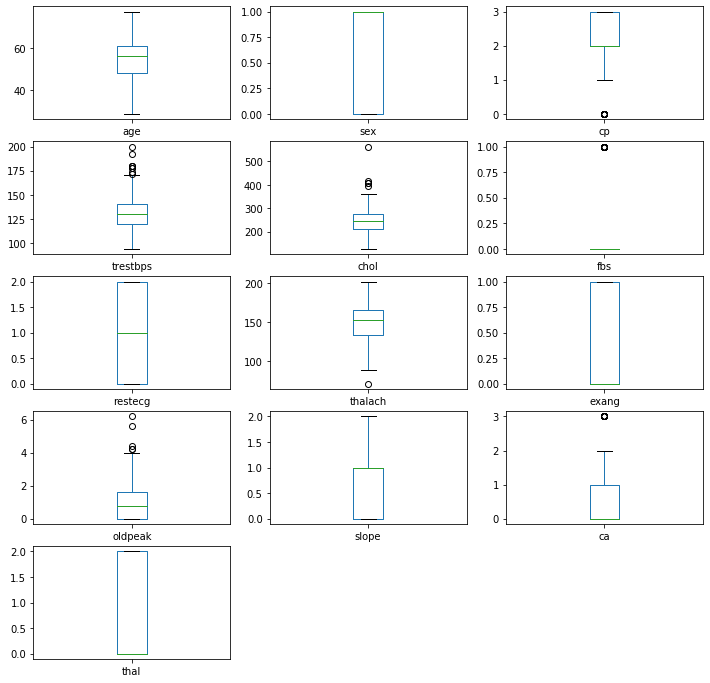

In [10]:
# box and whiskers plot
df_t = df.drop(['condition'],axis=1)
df_t.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

Забележуваme некои отстапувања(outlieres - вредности кои остапуваат од опсегот во кој се движат останати врености за одредена карактеристика) кога станува збор за:<br>
    cp - болки во градите<br>
    trestpbs - нормален крвен притисок<br>
    chol - холестерол <br>
    fbs - ниво на шеќер во крв <br>
    oldpeak - СТ-депресија предизвикана од физичка активност во релација со истата при одмарање<br>
    ca - број на крвни садови осветлени при флоуроскопија<br>

### Приказ на countplots за дискретни променливи.
Бројот на мажи(1) е поголем од бројот на жени во обервациите.<br>
Асимтоматската болка  во гради (3) е најчест тип на болка неангинална (2) е втор најчест тип.<br>
Бројот на обесервации со ниво на шеќер во крвта < 120 mg/dl при постење (0) е поголем.<br>
Бројот на нормални резултати (0) е најфреквентен кога станува збор за ЕКГ резулти, додека најверојатна или дефинитивна вертикуларна хипертрофија на левата комора на срцето според Естес критериум(2) го зазема второто место .<br>
Имаме повеќе обсервации за срцева ангина која не е предизвикана од физичка активност (0).<br>
Ратечки наклон (0) е најчест тип на наклон на СТ-сегмент, константен (1) е втор најчест.<br>
(0) е најчест број на обоени крвни садови при флуороскопија, (1) е втор најчест.<br>
(0) Thalassemia minor е најчеста категорија на припадност во thal, (2) Thalassemia major е втора најчеста.<br>
Конечно, во обсервациите бројот на пациенти кои немаат срцево заболување е поголем.<br>

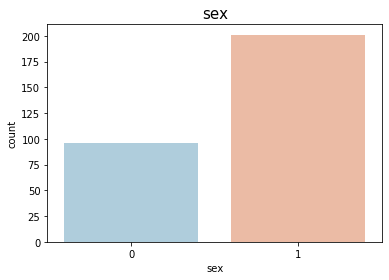

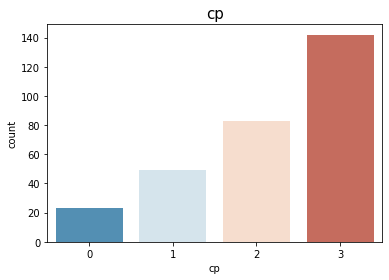

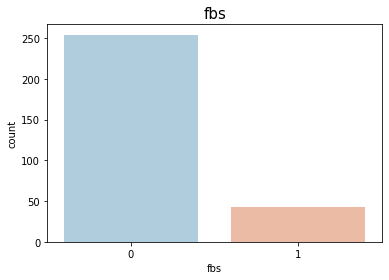

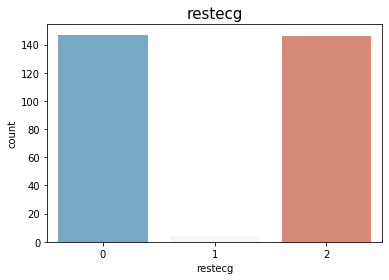

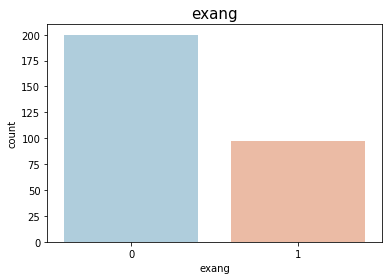

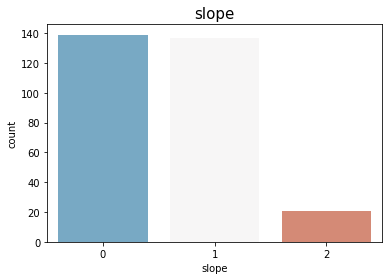

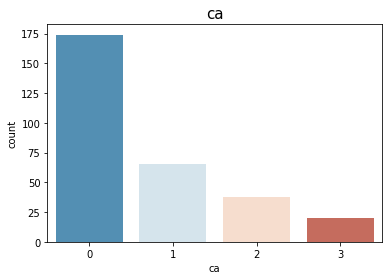

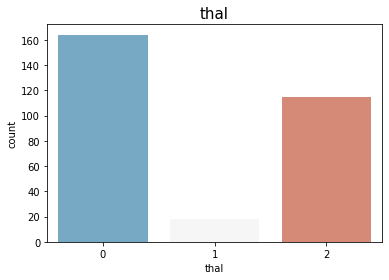

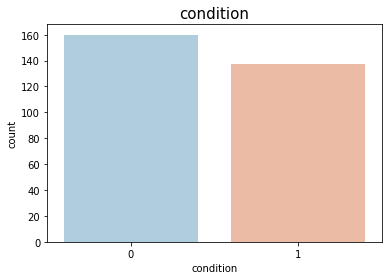

In [11]:
df1 = df.drop(['age','trestbps','chol','thalach','oldpeak'],axis=1)

for i, col in enumerate(df1.columns):
    plt.figure(i)
    plt.title(col, color='black',fontsize=15)
    sns.countplot(x=col, data=df1,palette='RdBu_r')

### Countplots со срцево заболување (condition) како втор фактор.
Мажите страдаат од срцеви заболувања повеќе од колку жените.<br>
Интересено е да се обесервира дека пациентите со асимптомацики болки во градите имаат поголем степен на срцеви заболувања од колку останатите пациенти.Овој фактор влегува во heatmap со коефициент 0.41 што не е низок коефициент, меѓутоа можеби болката во срцето (cp) не е добар индикатор за постоење на срцево заболување.<br>
Според ЕКГ резултатите при физичко мирување, пациентите со вредност (1) и (2) се посклони на срцеви заболувања.<br>
Пциентите со ангина предизвикана од физичка активност се по склони на срцеви заболувања.<br>
Според наклонот на пикот на СТ-сегментот на ЕКГ резултатот, пациентите со константен наколон имаат поголема рата на срцеви заболувања.<br>
Бројот на пациенти со срцеви заболувања се зголемува како што се зголемува бројот на обоени крвини садови (0-3) при флуороскопија.<br>
Според thal, пациентите со halassemia major страдаат повеќе од срцеви заболувања од колку останатите две категории.

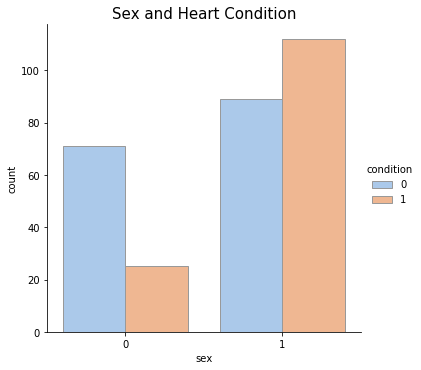

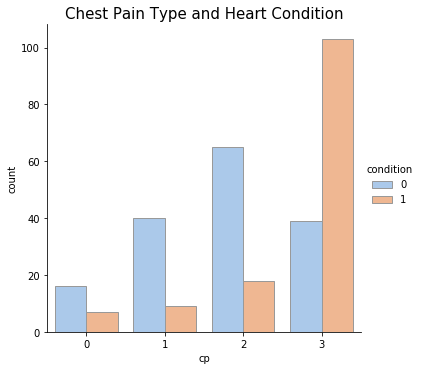

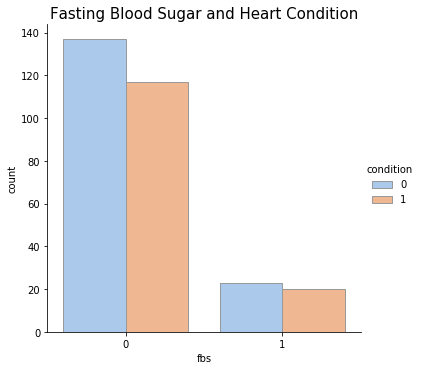

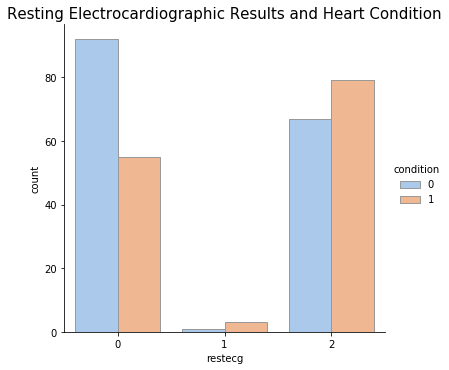

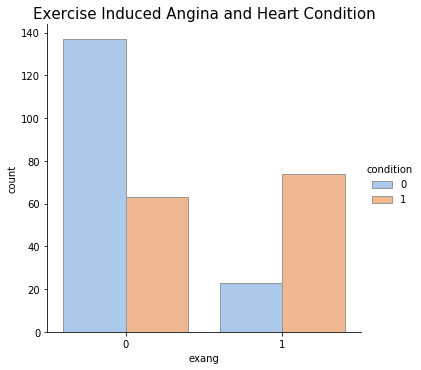

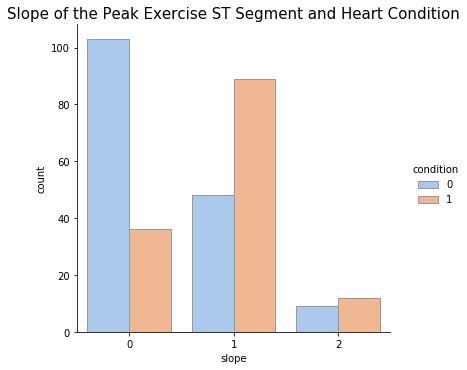

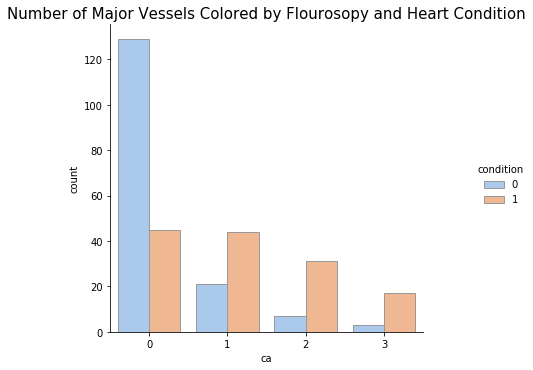

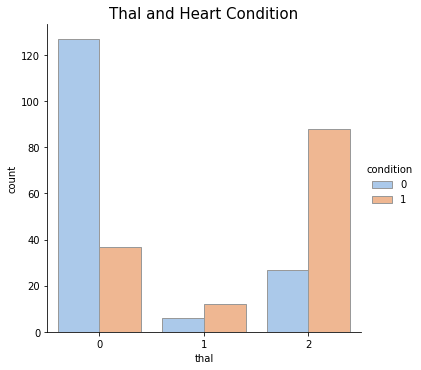

In [12]:
sns.catplot(x="sex", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Sex and Heart Condition', fontsize=15)
plt.show()

sns.catplot(x="cp", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Chest Pain Type and Heart Condition', fontsize=15)
plt.show()

sns.catplot(x="fbs", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Fasting Blood Sugar and Heart Condition', fontsize=15)
plt.show()

sns.catplot(x="restecg", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Resting Electrocardiographic Results and Heart Condition',fontsize=15)
plt.show()

sns.catplot(x="exang", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Exercise Induced Angina and Heart Condition',  fontsize=15)
plt.show()

sns.catplot(x="slope", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Slope of the Peak Exercise ST Segment and Heart Condition',  fontsize=15)
plt.show()

sns.catplot(x="ca", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Number of Major Vessels Colored by Flourosopy and Heart Condition',  fontsize=15)
plt.show()

sns.catplot(x="thal", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Thal and Heart Condition',fontsize=15)
plt.show()

### Категорични во однос на дискретни вредности

Поголем е бројот на пациенти од срцеви заболувања доколку станува збор за срцева ангина предизвикана од физичка активност, и најчесто кај пациенти кои во старосна група од 35 до 70 години.<br>
Поголем е бројот на пациенти од срцеви заболувања доколку станува збор за срцева ангина предизвикана од физичка активност, притиоа крвниот притсок при мирување се движи од 100 до 180, додека бројот на срцеви заболувања во однос на срцева ангина која не е предизикана од физичка активност е знацително помал кога станува збор за истиот опесег на крвен притисок.<br>
Истото важи и во однос на холестеролот, поголем е бројот на пациенти од срцеви заболувања доколку станува збор за срцева ангина предизвикана од физичка активност, со тоа што нивото на холестерол кај оние со срцеви заболувања се движи претежно од 180 мг/дл до 350 мг/дл со неколку отстапувања.<br>
Поголем е бројот на пациенти од срцеви заболувања доколку станува збор за срцева ангина предизвикана од физичка активност, со тоа што максималниот пулс варира од 90 до 180.<br>
Исто важи и за СТ депресија, со тоа што вредностите на СТ депресија најчесто се движат во опсег од 2 до 4.<br>

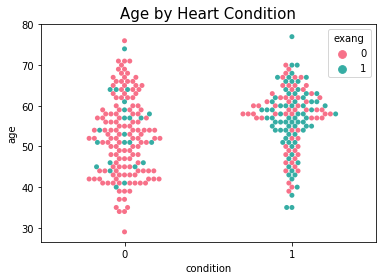

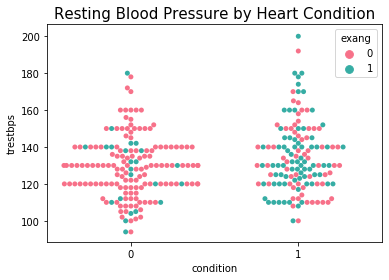

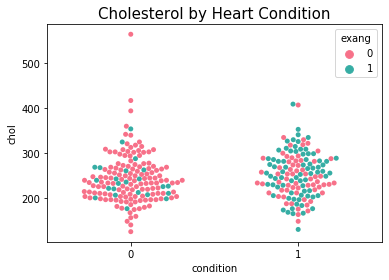

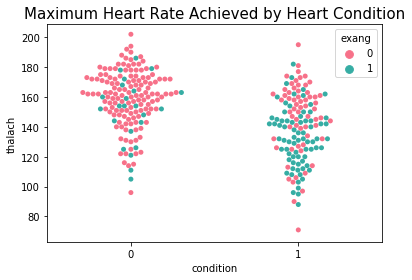

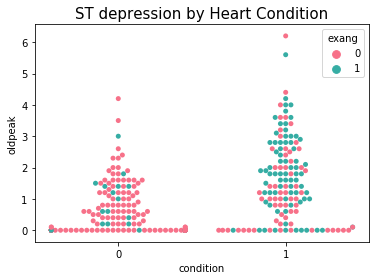

In [13]:
# exang
sns.swarmplot(x="condition", y="age", hue='exang' ,data=df, palette='husl')
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='exang' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='exang' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='exang' ,data=df, palette='husl')
plt.title('Maximum Heart Rate Achieved by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='exang' ,data=df, palette='husl')
plt.title('ST depression by Heart Condition',  fontsize=15)
plt.show()

Од првиот график се гледа дека најмногу срцви заболувања имаат пациентите со години од 38 до 70 со тоа што наклонот на кривата на СТ сегметот е 1 - контантен, доколку наклонот на кривата е 0 - опаѓачки пациентите најчесто не страдаат од срцево заболување,додека долку наклонот на кривата е 2- растечки бројот на пациенти што страдаат и не страдаат од срцеви заболувања е речиси подеднакво поделен<br>
Истите заклучоци можат да се добијат и за останатите карактеристики со тоа што:<br>
trestbs - има неколку две впечатливи отстапувања имаме вредности за наклон 0 и наклон 2 што припаѓаат на пациенти со срцеви заболувања притоа со надпросечно висок кревен притисок од 195/200<br>
chol - има едно впечатливо отстапување, иако поголемиот дел на пациенти со slope 1 припаѓаат во пациенти со срвеци заболувања, оваа е пациент без срцево заболување со прилично високо ниво на холестерол од околу 600<br>
oldpeak - има две отстапувања за вредност наклон 2, притоа со многу високо ниво на ст-депресија 5.5 и 6.5, и станува збор за пациенти со срцево заболубање

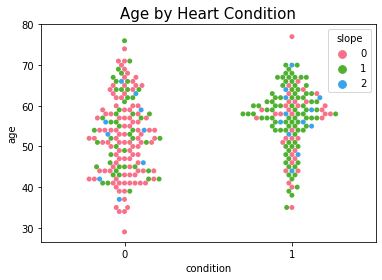

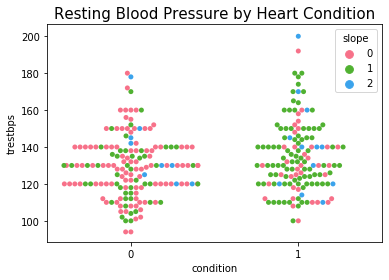

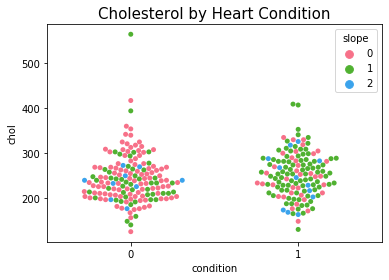

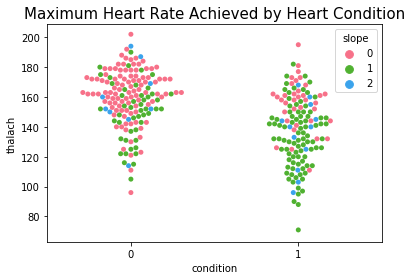

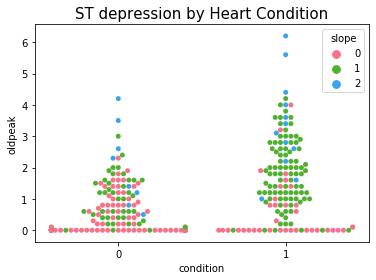

In [14]:
# slope
sns.swarmplot(x="condition", y="age", hue='slope' ,data=df,palette='husl' )
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='slope' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='slope' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='slope' ,data=df, palette='husl')
plt.title('Maximum Heart Rate Achieved by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='slope' ,data=df, palette='husl')
plt.title('ST depression by Heart Condition', fontsize=15)
plt.show()

Од графиците може да се забележи дека најголемиот дел од пациентите со вредност ca=0 припаѓаат во групата без срцеви заболувања, додека со растење на вредноста на ca расте и бројот на заболени пациенти.<br>
Опсегот на години во кои припаѓаат пациентите со срцеви заболувања се движи од 45 до 70, со едно отстапување.<br>
Крвниот притсок на пациенти со срцево заболување се движи од 100 до 180, со две отстапувања.<br>
Максималниот пулс се движи во опсег од 90 до 180, кај пациенти со срцеви заболувања, а кај пациенти без срцеви заболувања е значително поголем од 150 до 190 со неколку отстапувања.<br>
oldpeak - има две отстапувања за вредност на ca 0 и 3, притоа со многу високо ниво на ст-депресија 5.5 и 6.5, и станува збор за пациенти со срцево заболубање

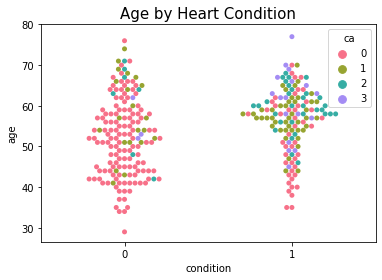

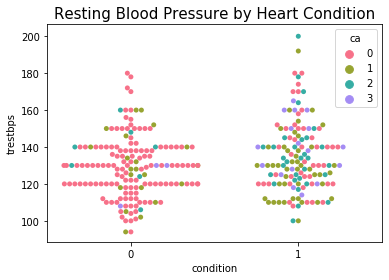

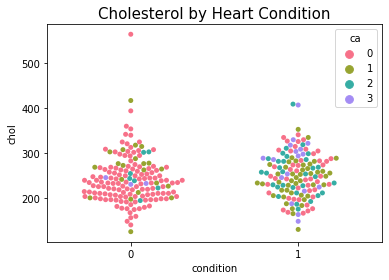

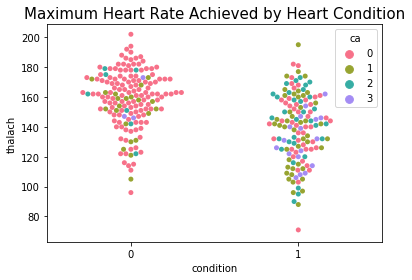

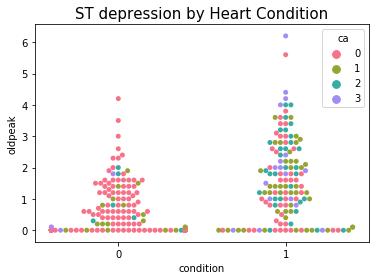

In [15]:
# ca
sns.swarmplot(x="condition", y="age", hue='ca' ,data=df, palette='husl')
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='ca' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='ca' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='ca' ,data=df,palette='husl' )
plt.title('Maximum Heart Rate Achieved by Heart Condition',fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='ca' ,data=df, palette='husl')
plt.title('ST depression by Heart Condition',fontsize=15)
plt.show()

Како и во претходните случаеви, за сите графици на кој се обработува thal важи дека за вредност на thal- 0 поголемиот број на пациенти немаат срцево заболување, за вредност на thal-2 поголемиот број на пациенти имаат срцево заболување, а thal-1 бројот е поделен речиси исто.

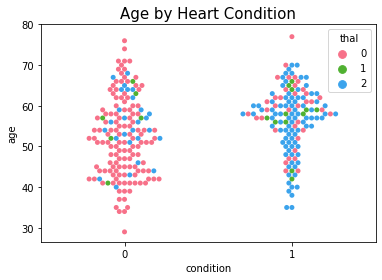

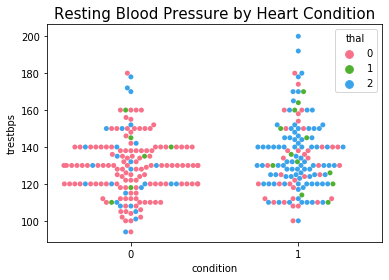

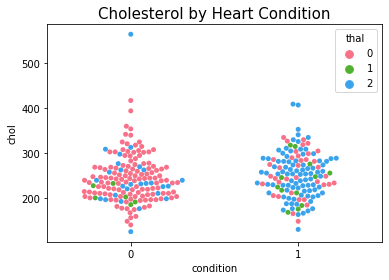

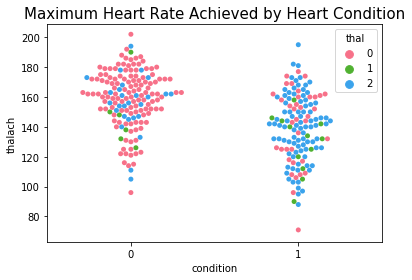

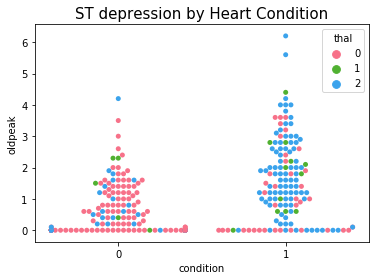

In [16]:
#thal
sns.swarmplot(x="condition", y="age", hue='thal' ,data=df, palette='husl')
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='thal' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='thal' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='thal' ,data=df, palette='husl')
plt.title('Maximum Heart Rate Achieved by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='thal' ,data=df,  palette='husl')
plt.title('ST depression by Heart Condition', fontsize=15)
plt.show()

### Data Processing
 
По разгледувањето и објаснување на датасетот дадено погоре можеме да забележиме дека има многу features кои имаат категорични вредности, за да ги претвориме таканаречените categorical features во dummy variables ќе го користиме методот 'get_dummies', а потоа ќе извршиме скалирање на вредностите, видејќи како што се гледа погоре имаме големи разлики во вредностите. На пример за age имаме вредности од 29 до 77 години, за chol од 126 до 564, а condition има вредности само 0 и 1, затоа имаме потреба од скалирање.

In [17]:
dataset = pd.get_dummies(df, columns = ['cp','restecg', 'exang', 'slope', 'ca', 'thal'])
dataset.head()

,age,sex,trestbps,chol,fbs,thalach,oldpeak,condition,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,69,1,160,234,1,131,0.1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,69,0,140,239,0,151,1.8,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,66,0,150,226,0,114,2.6,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,65,1,138,282,1,174,1.4,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,64,1,110,211,0,144,1.8,0,1,0,...,0,1,0,1,0,0,0,1,0,0


Во табелата погоре можеме да забележиме дека се додадени нови колини кои одговараат на категорични вредности кои ги имавме претходно.

## Data scaling
### Standartization and Normalization

#### Normalization(Min-max Normalization)
- ни овозможува да ги скалираме вредностите помеѓу 0 и 1
- $ Xnorm = (X-Xmin)/(Xmax-Xmin) $

#### Standartization(StandardScaler)
- ни овозможува слалирање на вредностите базирано на стандарна нормална распределба(најчесто mean(mi) = 0, а  std(sigma) = 1)
- $ z = (x-mi)/sigma $

### Стандардизација

In [18]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#standardScaler = StandardScaler()
#columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

### Нормализација

In [19]:
from sklearn.preprocessing import MinMaxScaler
X = dataset.drop(["condition"],axis = 1)
y = dataset.condition
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)

X1 = dataset.drop(["condition"],axis = 1)
y1 = dataset.condition
scaler1 = MinMaxScaler().fit(X1)
X1_scaled = scaler1.transform(X1)

### Класификација

Класификацијата е процес на класифицирање на одреден датасет во одреден број на класи. Во нашиот случај имаме бинарна класицикација, бидејќи еден пациент може да страда од заболување на срцето или да не страда од истото. 
Класификатор во овој случај има потреба од traning data за да разбере како влезните променливе се поврзани со класата. Од како ќе го истренираме класикаторот, истиот може да се користи за предвидување дали одреден пациент со одредени параметри има срцево заболување или не.<br>
*Класификатор - алгоритам што врши мапирање на влезните податоци во одредена категорија<br>
*Клацификациски модел - врши донесување заклучоци влезните податоци кои се издвоени за тренирање и предвидува во која категорија припаѓа пациентот<br>
*Бинарна класификација - две класи (0-1)<br>

Ќе ги следиме следниве постапки:<br>
<ul>
    <li>Иницијализација на класификаторот</li>
    <li>Тренеирање на класификаторот - .fit(за тренирање на X_train и y_train)</li>
    <li>Предвидување на тратгетот на y_test множеството</li>
    <li>Евалуација (cross-val, roc)</li>
</ul>

### Поделба да датасет

Датасетот го делиме на X_train и у_train на кој ќе вршиме тренирање на моделите, и на X_test и y_test со кој ќе вршиме тестирање на моделите. Тоа го правиме со функцијата train_test_split.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=40)
X1_train, X1_test, y1_train, y1_test=train_test_split(X1_scaled,y1,test_size=0.3,random_state=40)

In [21]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 5382
X_test- 2340
y_train- 207
y_test- 90


На овој датасет ќе користиме 6 алгоритми за класикација и тоа:
<ul>
    <li>K-Nearest Neighbor</li>
    <li>Naive Bayes</li>
    <li>Logistic Regression</li>
    <li>Decision Tree Classifier</li>
    <li>Random Forest Classifier</li>
    <li>Support Vector Machine</li>
</ul>

### K Neighbors Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

In [23]:
kNN = KNeighborsClassifier()
model_kNN = kNN.fit(X_train, y_train)
prediction_kNN = model_kNN.predict(X_test)
y_pred_quant_kNN = model_kNN.predict_proba(X_test)[:, 1]

In [24]:
print(confusion_matrix(y_test, prediction_kNN))
accuracy_score(y_test,prediction_kNN)

[[35 13]
 [ 7 35]]


0.7777777777777778

In [25]:
print(classification_report(y_test, prediction_kNN))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        48
           1       0.73      0.83      0.78        42

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



#### Cross-Validation

Точност-score kNN: 0.87
Прецизност kNN: 0.69
Чувствителност kNN: 0.64
F1 kNN: 0.67


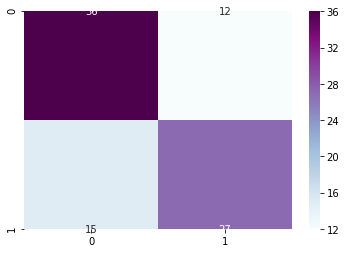

In [26]:
score_kNN = cross_val_score(kNN, X_train, y_train, cv=10)
score_kNN
print("Точност-score kNN: %0.2f" % (score_kNN.mean()))
y_kNN_pred = cross_val_predict(kNN, X_test, y_test, cv=10)
mkNN = confusion_matrix(y_test, y_kNN_pred)
sns.heatmap(mkNN, annot=True,cmap='BuPu')
preci_kNN = precision_score(y_test, y_kNN_pred)
print("Прецизност kNN: %0.2f" % preci_kNN)
sensi_kNN = recall_score(y_test, y_kNN_pred)
print("Чувствителност kNN: %0.2f" % sensi_kNN)
f1_kNN = f1_score(y_test, y_kNN_pred)
print("F1 kNN: %0.2f" % f1_kNN)
proba_kNN = cross_val_predict(kNN, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Validation Curve (indetification of over/under fitting)

In [27]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name = 'n_neighbors'
param_range = np.arange(3, 20, 2)
cv= StratifiedKFold(4)

train_scores, valid_scores = validation_curve(kNN, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                                cv=cv)
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

[[0.81531532 0.79372197 0.76681614 0.85650224]
 [0.78378378 0.77130045 0.75336323 0.8161435 ]
 [0.73873874 0.76681614 0.69955157 0.79372197]
 [0.73423423 0.7264574  0.70403587 0.75784753]
 [0.74324324 0.7264574  0.68609865 0.73991031]
 [0.74324324 0.70852018 0.65470852 0.73542601]
 [0.72972973 0.71300448 0.68161435 0.70852018]
 [0.72072072 0.70852018 0.67264574 0.7309417 ]
 [0.74324324 0.71300448 0.65919283 0.75336323]]
[[0.62666667 0.59459459 0.71621622 0.5       ]
 [0.58666667 0.58108108 0.74324324 0.52702703]
 [0.61333333 0.59459459 0.71621622 0.54054054]
 [0.61333333 0.60810811 0.68918919 0.51351351]
 [0.58666667 0.62162162 0.75675676 0.51351351]
 [0.6        0.60810811 0.7972973  0.52702703]
 [0.57333333 0.62162162 0.82432432 0.55405405]
 [0.61333333 0.60810811 0.81081081 0.54054054]
 [0.62666667 0.67567568 0.75675676 0.56756757]]


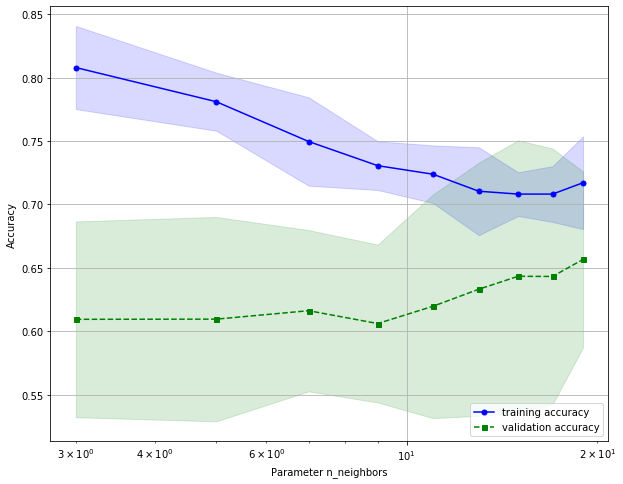

In [28]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n_neighbors')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()

#### Learning Curve

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


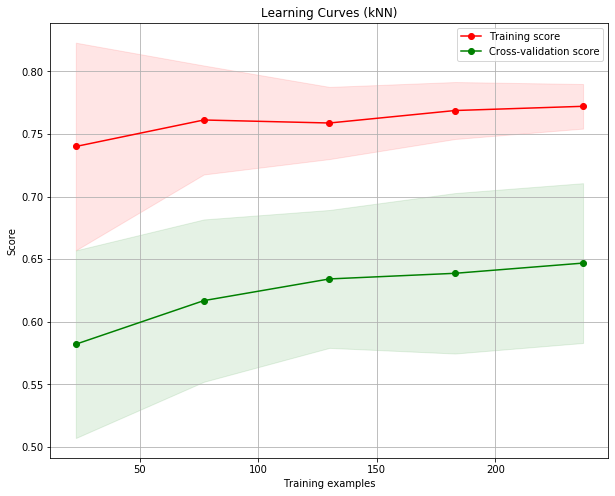

In [30]:
title = "Learning Curves (kNN)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = kNN
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

#### ROC Curve

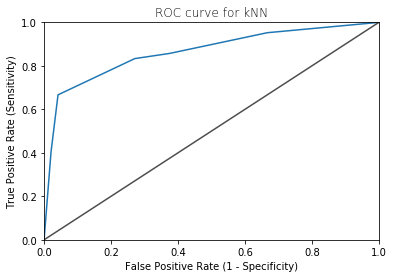

AUC Score : 0.8645833333333333


In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_kNN)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for kNN', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc_kNN = auc(fpr, tpr)
print("AUC Score :", auc_kNN)

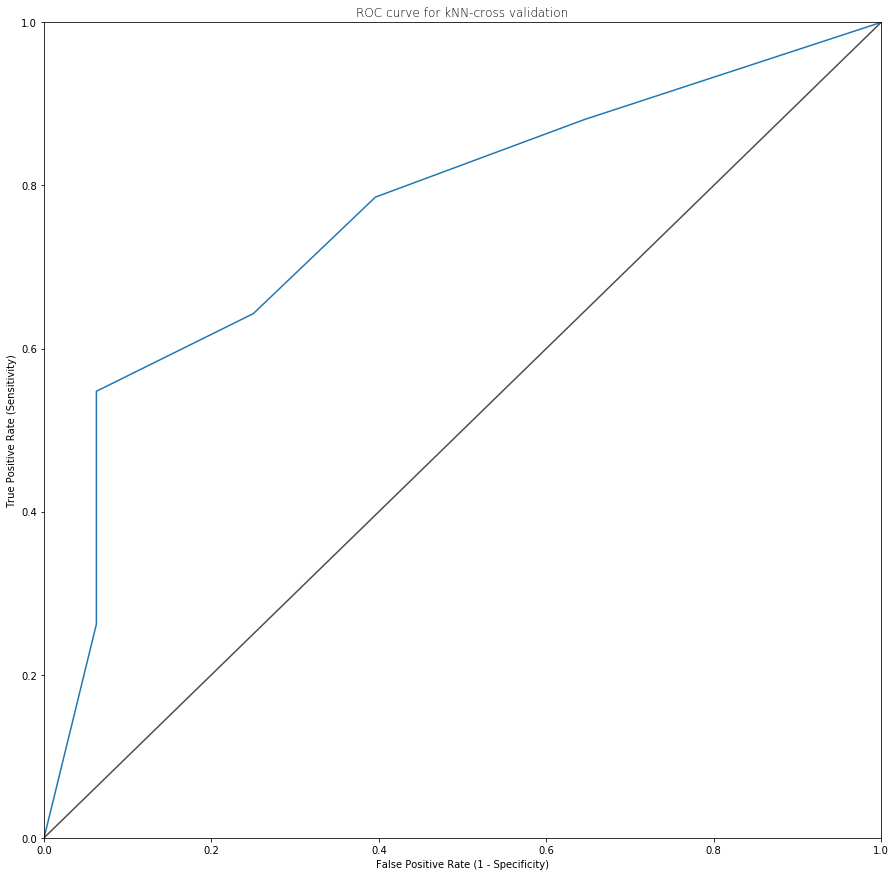

AUC Score : 0.7653769841269842


In [32]:
fpr, tpr, thresholds = roc_curve(y_test, proba_kNN)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for kNN-cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc_kNN_score = auc(fpr, tpr)
print("AUC Score :", auc_kNN_score)

#### Model tunning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
knn_params = {"n_neighbors": np.arange(1,50)}
knn_cv = GridSearchCV(kNN, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
print("Best score:" + str(knn_cv.best_score_))
print("Best parameters: " + str(knn_cv.best_params_))

Best score:0.8840579710144928
Best parameters: {'n_neighbors': 11}


In [36]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn_tuned = knn.fit(X_train, y_train)

In [37]:
prediction_knn = knn_tuned.predict(X_test)
y_pred_knn_tuned = knn_tuned.predict_proba(X_test)[:, 1]

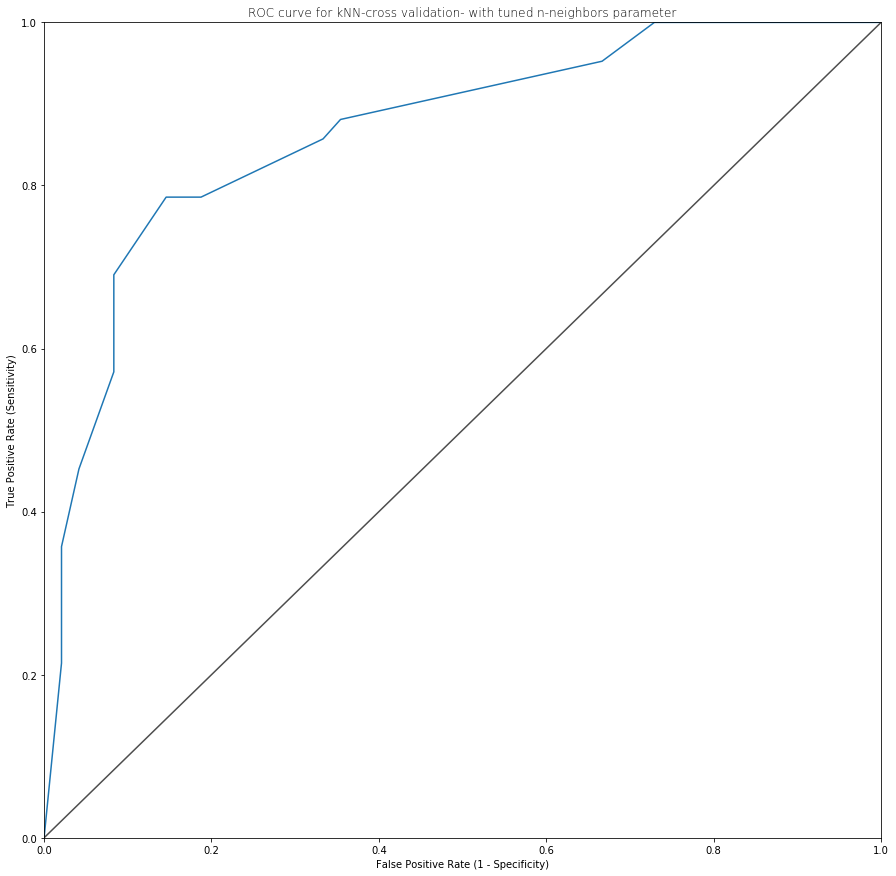

AUC Score : 0.8670634920634921


In [38]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_knn_tuned )

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for kNN-cross validation- with tuned n-neighbors parameter', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc_kNN_tuned = auc(fpr, tpr)
print("AUC Score :", auc_kNN_tuned)

### Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
NB = GaussianNB()
model_NB = NB.fit(X_train, y_train)
prediction_NB = model_NB.predict(X_test)
y_pred_quant_NB = model_NB.predict_proba(X_test)[:, 1]

In [41]:
accuracy_score(y_test,prediction_NB)

0.8

In [42]:
print(classification_report(y_test, prediction_NB))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        48
           1       0.82      0.74      0.78        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



#### Validation Curve

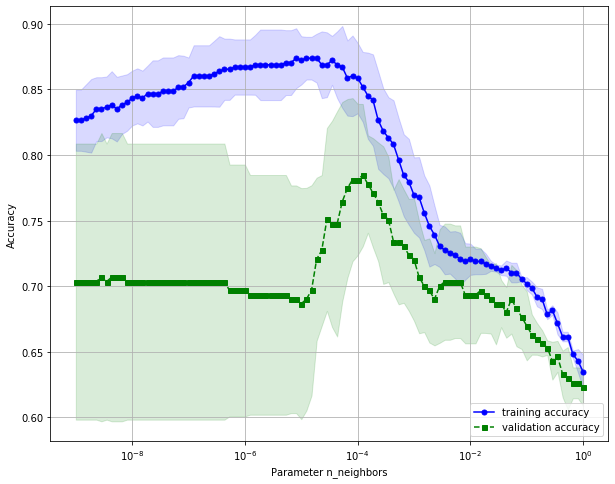

In [43]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

param_name = 'var_smoothing'
param_range = np.logspace(0,-9, num=100)

train_scores, valid_scores = validation_curve(NB, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range
                                               )


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n_neighbors')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()

#### Cross-validation

Точност-score NB: 0.84
Прецизност NB: 0.69
Чувствителност NB: 0.64
F1 NB: 0.67


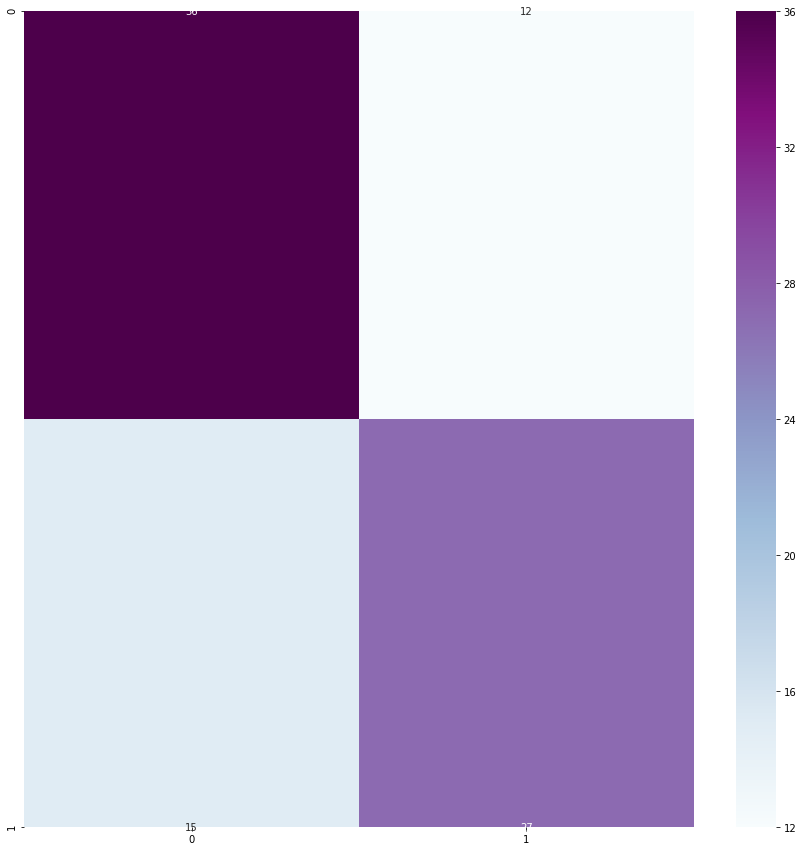

In [44]:
score_NB = cross_val_score(NB, X_train, y_train, cv=10)
score_NB
print("Точност-score NB: %0.2f" % (score_NB.mean()))
y_NB_pred = cross_val_predict(NB, X_test, y_test, cv=10)
mNB = confusion_matrix(y_test, y_NB_pred)
sns.heatmap(mNB, annot=True,cmap='BuPu')
preci_NB = precision_score(y_test, y_NB_pred)
print("Прецизност NB: %0.2f" % preci_NB)
sensi_NB = recall_score(y_test, y_NB_pred)
print("Чувствителност NB: %0.2f" % sensi_NB)
f1_NB = f1_score(y_test, y_NB_pred)
print("F1 NB: %0.2f" % f1_kNN)
proba_NB = cross_val_predict(NB, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Learning curve

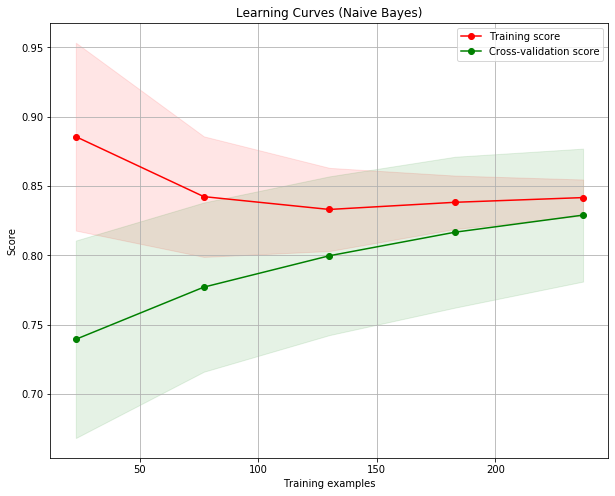

In [45]:
title = "Learning Curves (Naive Bayes)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = NB
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

#### ROC Curve

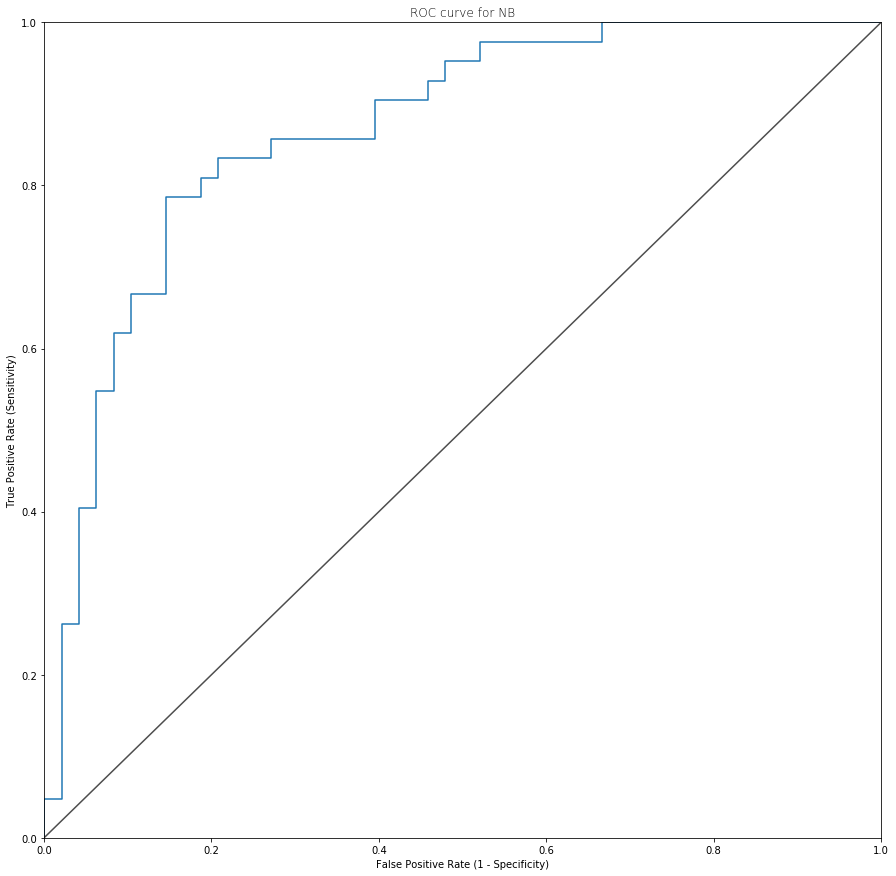

AUC Score : 0.8670634920634921


In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_NB)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for NB', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc_NB = auc(fpr, tpr)
print("AUC Score :", auc_NB)

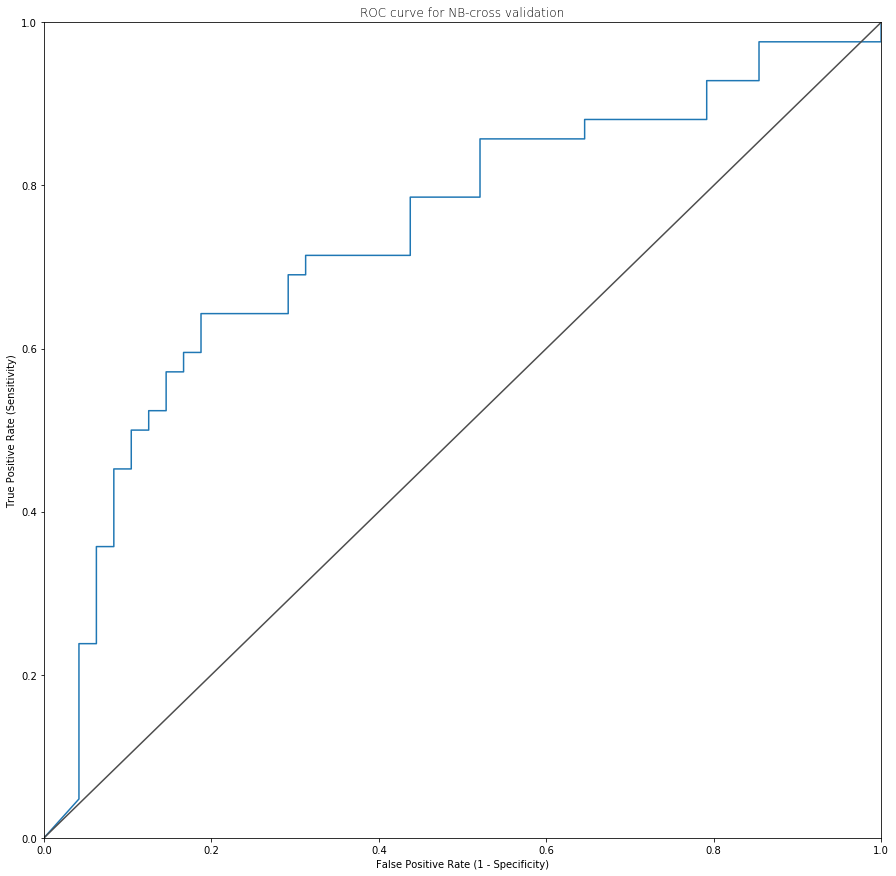

AUC Score : 0.7405753968253967


In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_NB)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for NB-cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc_NB_score = auc(fpr, tpr)
print("AUC Score :", auc_NB_score)

#### Model tuning

In [48]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')

gs_NB.fit(X_train, y_train);
gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.8s finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'var_smoothing': 0.23101297000831597}

In [49]:
gs_NB2 = GaussianNB(priors = None,var_smoothing=0.23101297000831597)
gs_NB2.fit(X_train, y_train);
prediction_NB_tuned = gs_NB2.predict(X_test)
y_pred_quant_NB_tuned = gs_NB2.predict_proba(X_test)[:, 1]

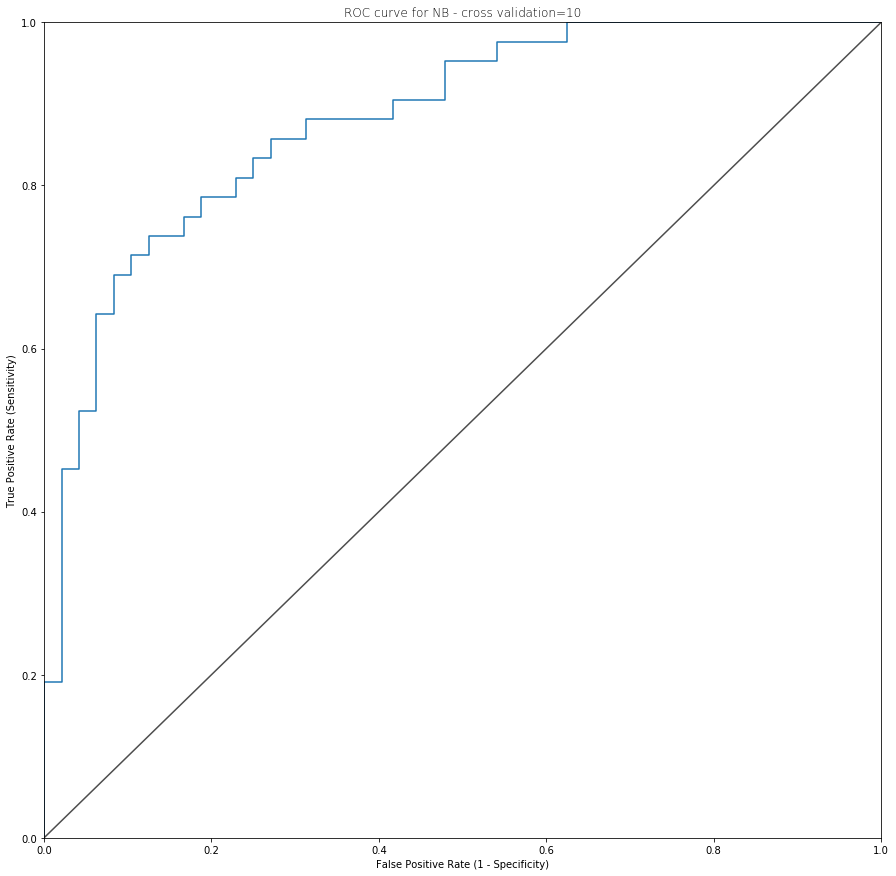

AUC Score : 0.8804563492063492


In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_NB_tuned)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for NB - cross validation=10', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


from sklearn.metrics import auc
auc_NB_tuned = auc(fpr, tpr)
print("AUC Score :", auc_NB_tuned)

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

In [52]:
LR = LogisticRegression()
model_LR = LR.fit(X_train,y_train)
prediction_LR = model_LR.predict(X_test)
y_pred_quant_LR = model_LR.predict_proba(X_test)[:, 1]

In [53]:
print(accuracy_score(y_test,prediction_LR))
confusion_matrix(y_test, prediction_LR)

0.7777777777777778


array([[39,  9],
       [11, 31]], dtype=int64)

In [54]:
print(classification_report(y_test, prediction_LR))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        48
           1       0.78      0.74      0.76        42

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



#### Cross-Validation

Точностscore LR: 0.87
Прецизност LR: 0.74
Чувствителност LR: 0.69
F1 LR: 0.72


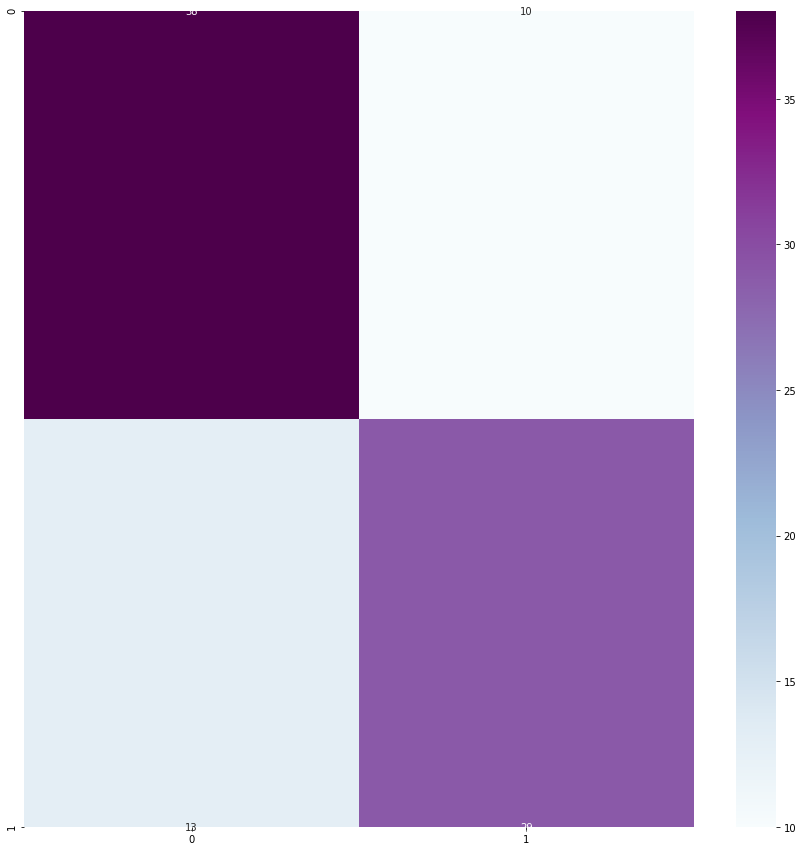

In [55]:
score_LR = cross_val_score(LR, X_train, y_train, cv=10)
score_LR
print("Точностscore LR: %0.2f" % (score_LR.mean()))
y_LR_pred = cross_val_predict(LR, X_test, y_test, cv=10)
mLR = confusion_matrix(y_test, y_LR_pred)
sns.heatmap(mLR, annot=True,cmap='BuPu')
preci_LR = precision_score(y_test, y_LR_pred)
print("Прецизност LR: %0.2f" % preci_LR)
sensi_LR = recall_score(y_test, y_LR_pred)
print("Чувствителност LR: %0.2f" % sensi_LR)
f1_LR = f1_score(y_test, y_LR_pred)
print("F1 LR: %0.2f" % f1_LR)
proba_LR = cross_val_predict(LR, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Validation Curve

[[0.90862944 0.83838384 0.85929648]
 [0.90862944 0.85353535 0.87939698]
 [0.92385787 0.85353535 0.89447236]
 [0.92385787 0.85858586 0.89949749]
 [0.92385787 0.86363636 0.89949749]
 [0.91878173 0.86868687 0.89949749]
 [0.91370558 0.86363636 0.89447236]
 [0.91878173 0.86363636 0.89447236]
 [0.91878173 0.86363636 0.89447236]
 [0.91878173 0.86363636 0.89447236]]
[[0.7        0.7979798  0.76530612]
 [0.69       0.80808081 0.73469388]
 [0.67       0.80808081 0.71428571]
 [0.67       0.80808081 0.7244898 ]
 [0.66       0.80808081 0.70408163]
 [0.66       0.80808081 0.69387755]
 [0.66       0.80808081 0.68367347]
 [0.66       0.81818182 0.68367347]
 [0.66       0.81818182 0.67346939]
 [0.66       0.81818182 0.65306122]]


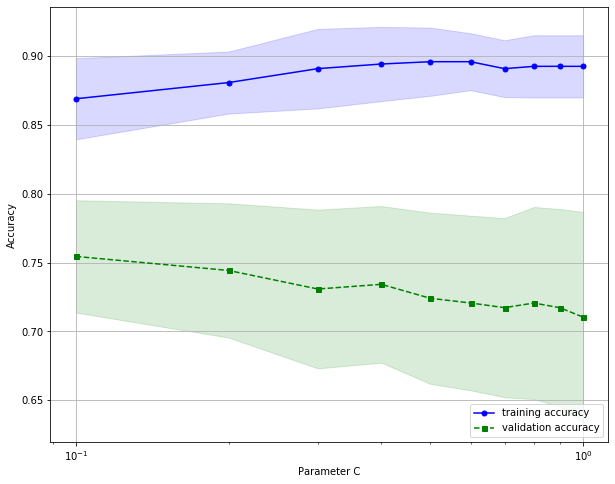

In [56]:
from sklearn.model_selection import validation_curve

param_name = "C"
param_range = np.linspace(.1, 1.0, 10)

train_scores, valid_scores = validation_curve(LR, 
                                              X, 
                                              y, 
                                              param_name,
                                              param_range)
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


#### Learning Curve

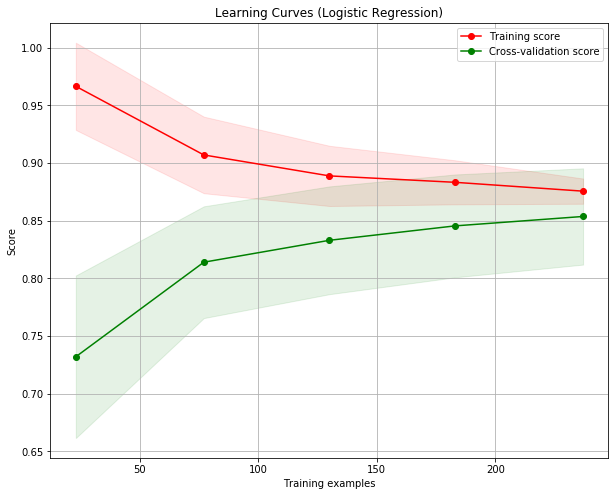

In [57]:
title = "Learning Curves (Logistic Regression)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LR
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

Посакуаната (идална) вредност на перформансот е 1, од сликата се забележува дека двете криви конвергираат кон 0.87 (High Bias Learning Curve). Тоа би значело недостаток на карактеристики (features).

#### ROC Curve

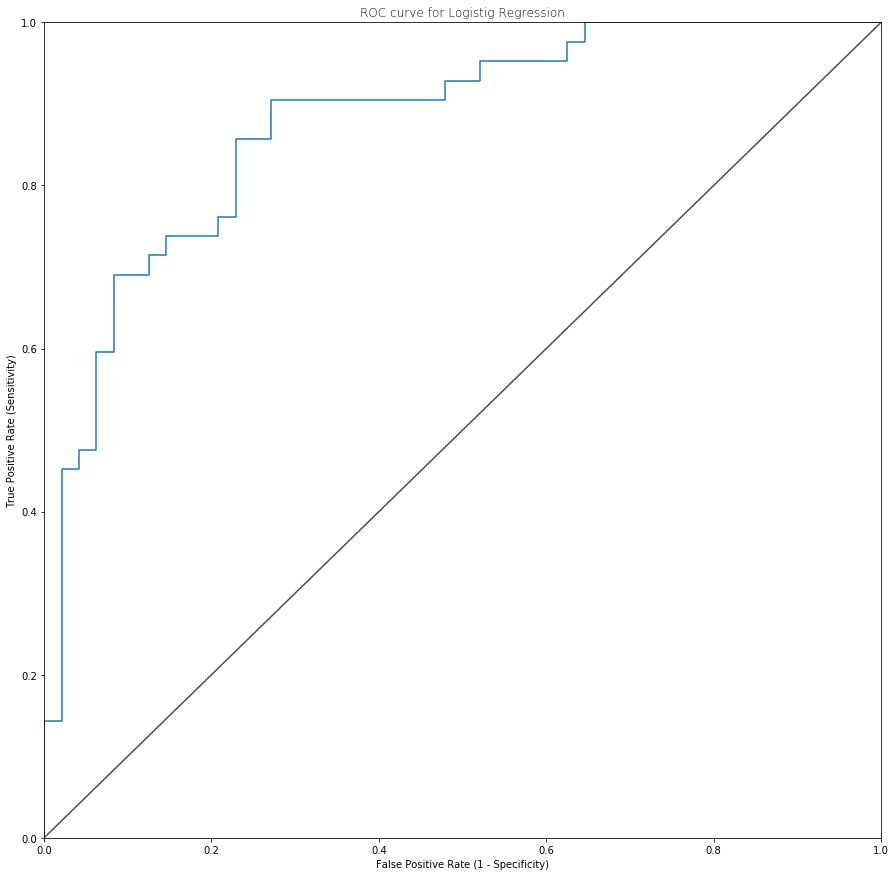

AUC Score : 0.876984126984127


In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_LR)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Logistig Regression', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_LR = auc(fpr, tpr)
print("AUC Score :", auc_LR)

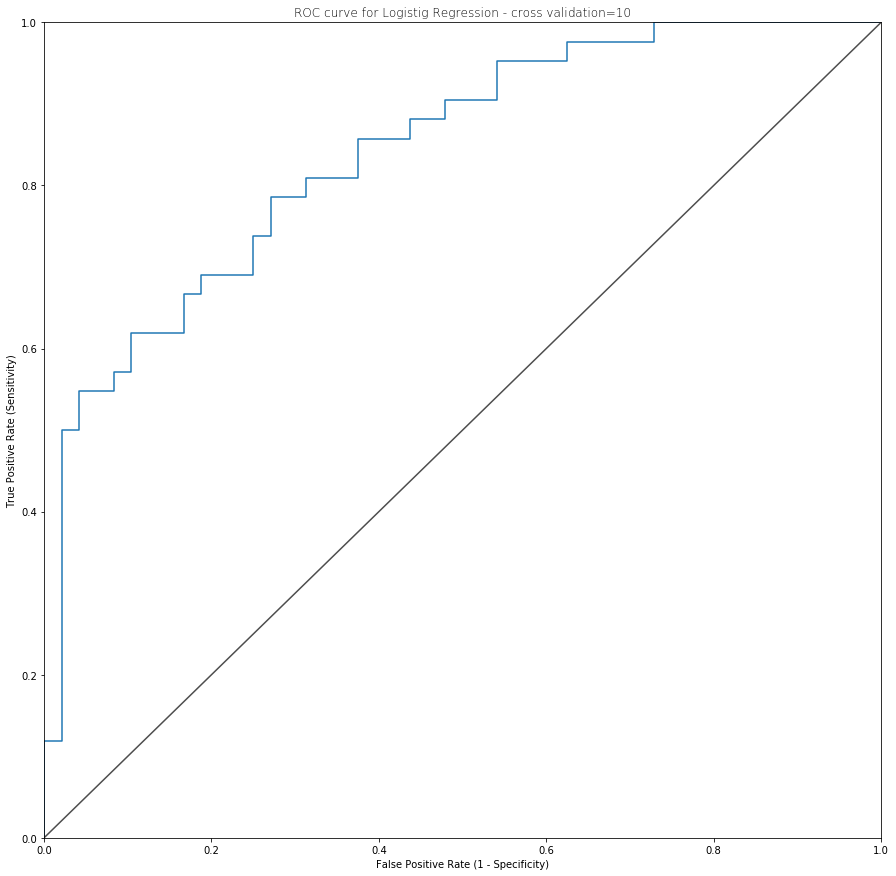

AUC Score : 0.8407738095238095


In [59]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_LR)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Logistig Regression - cross validation=10', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


from sklearn.metrics import auc
auc_LR_score = auc(fpr, tpr)
print("AUC Score :", auc_LR_score)

In [60]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8695652173913043


C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [130]:
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
prediction_LR_tuned = logreg2.predict(X_test)
y_pred_quant_LR_tuned = logreg2.predict_proba(X_test)[:, 1]

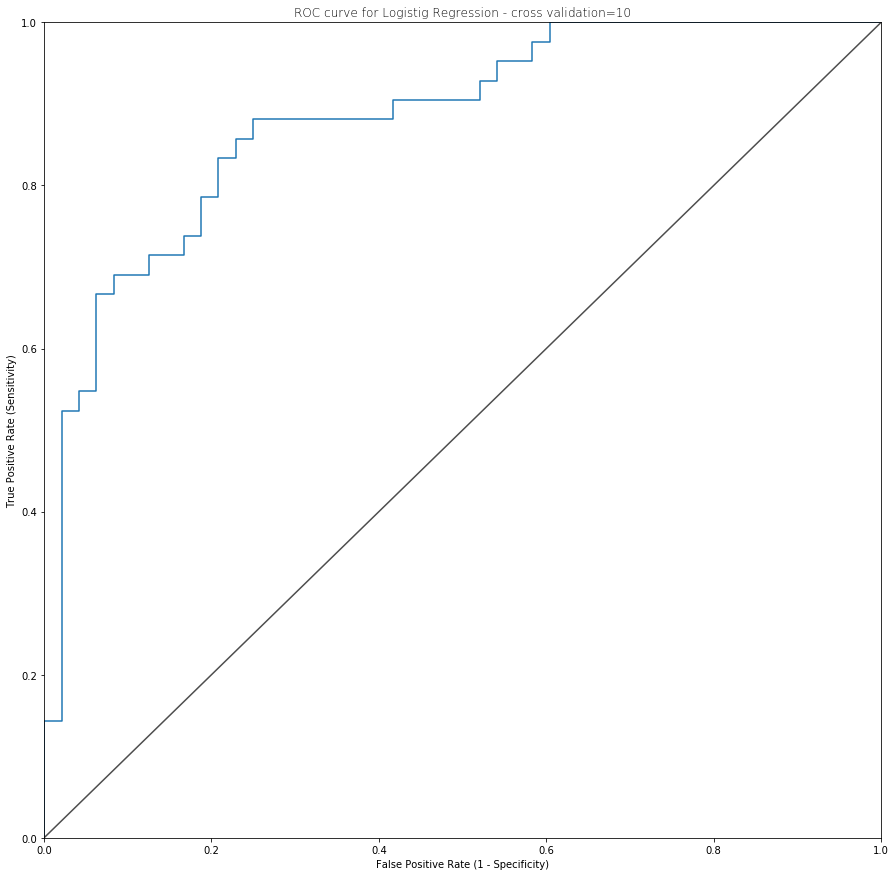

AUC Score : 0.8809523809523809


In [132]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred_quant_LR_tuned )
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Logistig Regression - cross validation=10', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


from sklearn.metrics import auc
auc_LR_tuned = auc(fpr, tpr)
print("AUC Score :", auc_LR_tuned)

###  Decision Tree Classifier

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
DTC = DecisionTreeClassifier()
model_DTC = DTC.fit(X_train,y_train)
prediction_DTC = model_DTC.predict(X_test)
y_pred_quant_DTC = model_DTC.predict_proba(X_test)[:, 1]

In [66]:
print(accuracy_score(y_test,prediction_DTC))
confusion_matrix(y_test, prediction_DTC)

0.6777777777777778


array([[35, 13],
       [16, 26]], dtype=int64)

#### Validation Curve

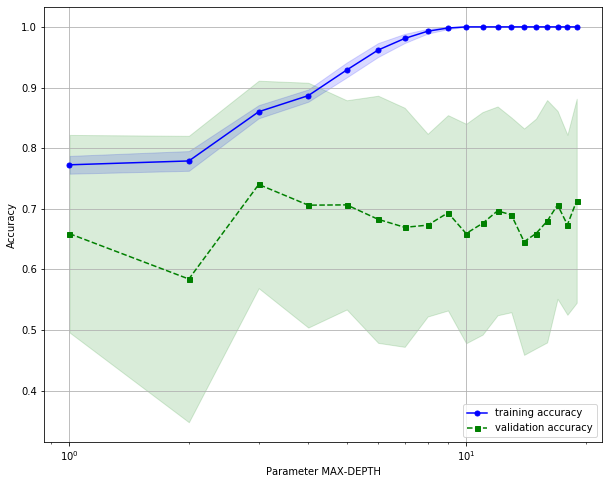

In [67]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name = "max_depth"
param_range = np.arange(1, 20)
cv=10

train_scores, valid_scores = validation_curve(DTC, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                               cv=cv
                                               )
(train_scores)
(valid_scores)

train_mean = np.mean(train_scores, axis=1);
train_std = np.std(train_scores, axis=1);

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter MAX-DEPTH')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


#### Cross-validation

Точност-score DTC: 0.75
Прецизност DTC: 0.69
Чувствителност DTC: 0.55
F1 DTC: 0.59


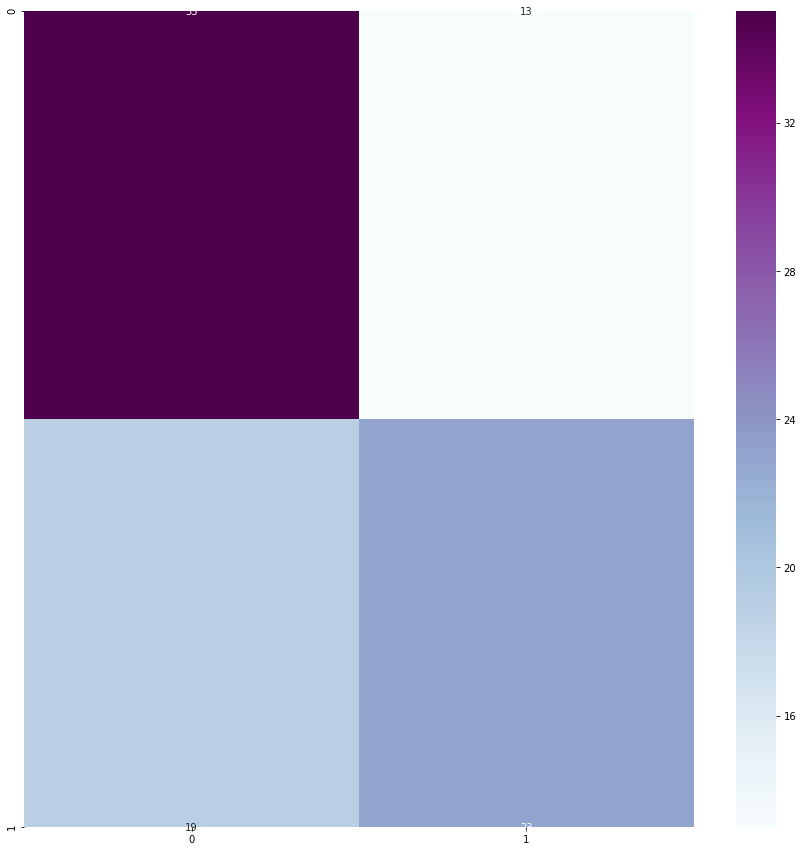

In [68]:
score_DTC = cross_val_score(DTC, X_train, y_train, cv=10)
score_DTC
print("Точност-score DTC: %0.2f" % (score_DTC.mean()))
y_DTC_pred = cross_val_predict(DTC, X_test, y_test, cv=10)
mDTC = confusion_matrix(y_test, y_DTC_pred)
sns.heatmap(mDTC, annot=True,cmap='BuPu')
preci_DTC = precision_score(y_test, y_DTC_pred)
print("Прецизност DTC: %0.2f" % preci_NB)
sensi_DTC = recall_score(y_test, y_DTC_pred)
print("Чувствителност DTC: %0.2f" % sensi_DTC)
f1_DTC = f1_score(y_test, y_DTC_pred)
print("F1 DTC: %0.2f" % f1_DTC)
proba_DTC = cross_val_predict(DTC, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Learning Curve

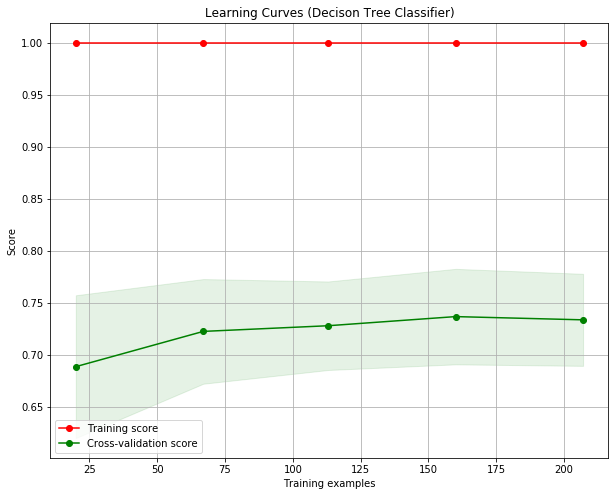

In [69]:
title = "Learning Curves (Decison Tree Classifier)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
estimator = DTC
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

#### ROC Curve

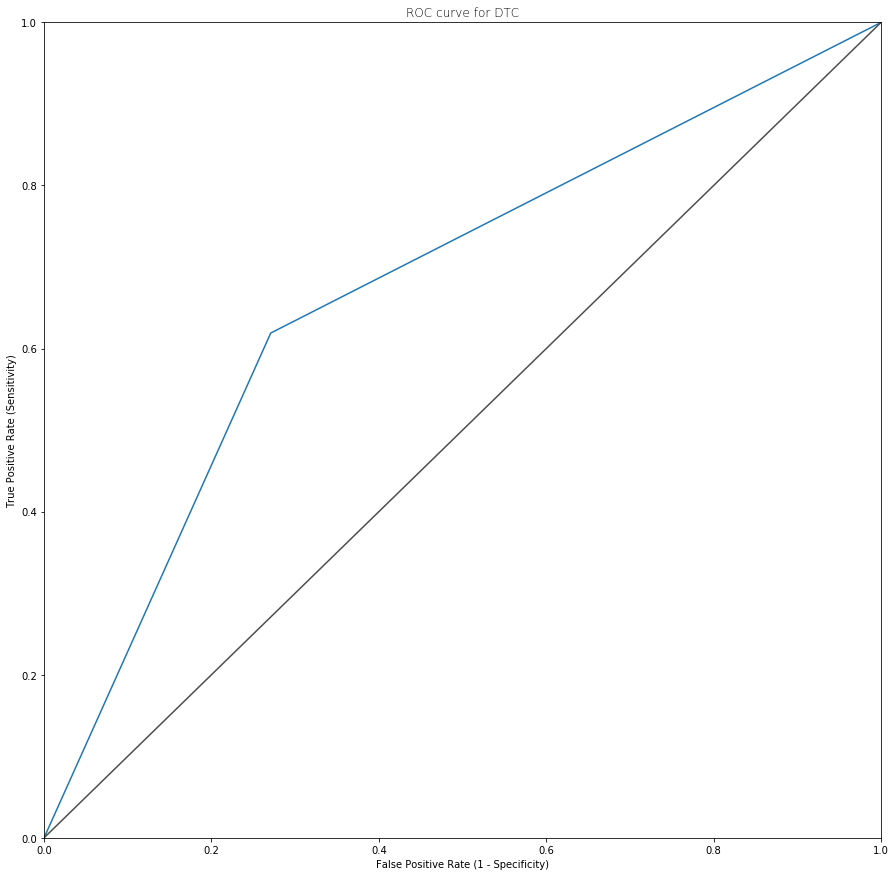

AUC Score : 0.6741071428571429


In [70]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_DTC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for DTC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_DTC = auc(fpr, tpr)
print("AUC Score :", auc_DTC)

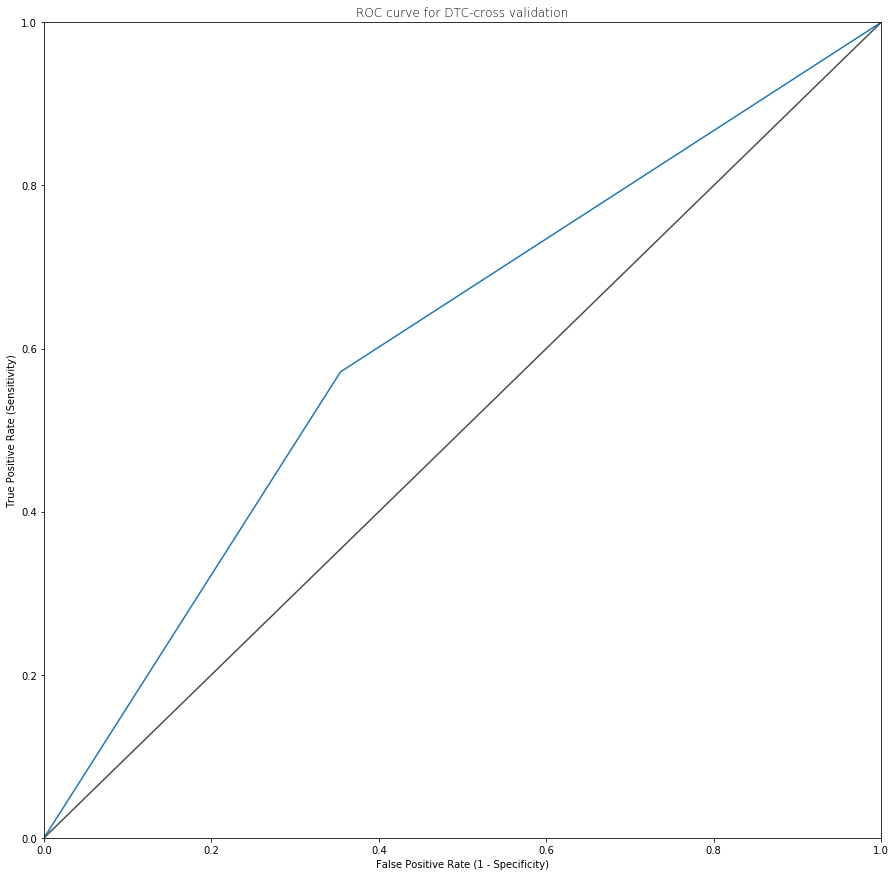

AUC Score : 0.6086309523809523


In [71]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_DTC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for DTC-cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_DTC_score = auc(fpr, tpr)
print("AUC Score :", auc_DTC_score)

In [72]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X_train, y_train);

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    0.7s finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [73]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}

In [135]:
from sklearn.tree import DecisionTreeClassifier
dfc_tuned = DecisionTreeClassifier(criterion= 'gini', max_depth = 1, min_samples_split = 2)
dfc_tuned.fit(X_train, y_train)
y_pred_DT_tuned =dfc_tuned.predict(X_test)
y_pred_quant_DT_tuned = dfc_tuned.predict_proba(X_test)[:, 1]

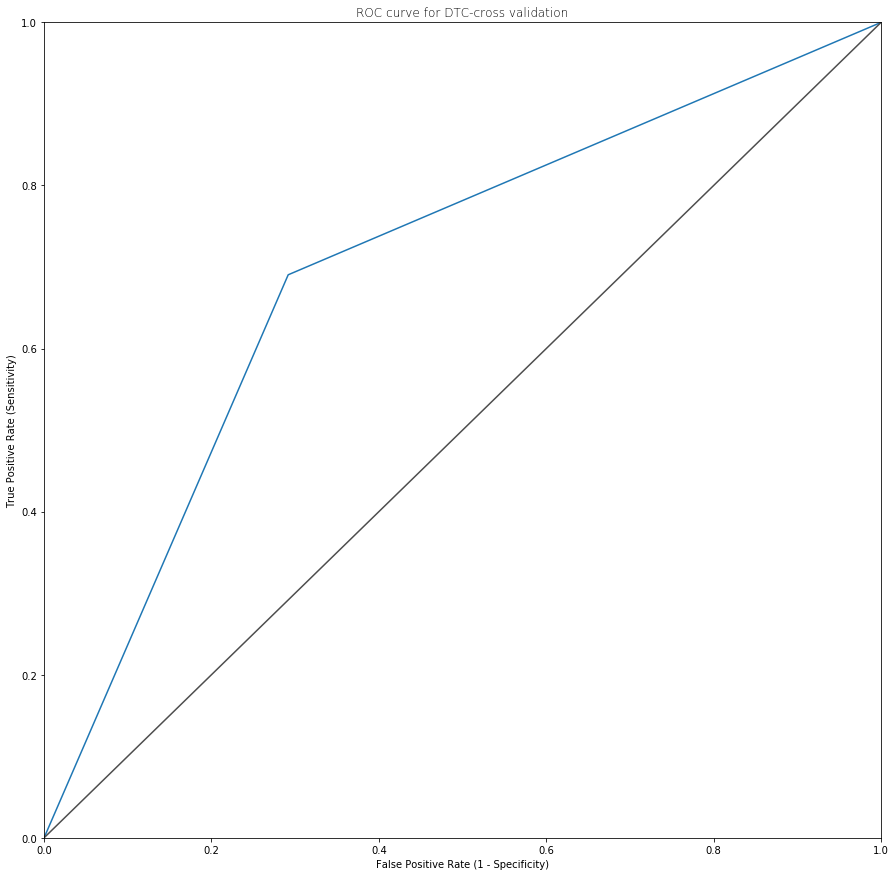

AUC Score : 0.6994047619047619


In [136]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_DT_tuned)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for DTC-cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_DTC_tuned = auc(fpr, tpr)
print("AUC Score :", auc_DTC_tuned)

### Random Forest Classifier

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
RFC = RandomForestClassifier()
model_RFC = RFC.fit(X_train,y_train)
prediction_RFC = model_RFC.predict(X_test)
y_pred_quant_RFC = model_RFC.predict_proba(X_test)[:, 1]

In [78]:
print(accuracy_score(y_test,prediction_RFC))
confusion_matrix(y_test, prediction_RFC)

0.7222222222222222


array([[38, 10],
       [15, 27]], dtype=int64)

#### Validation Curve

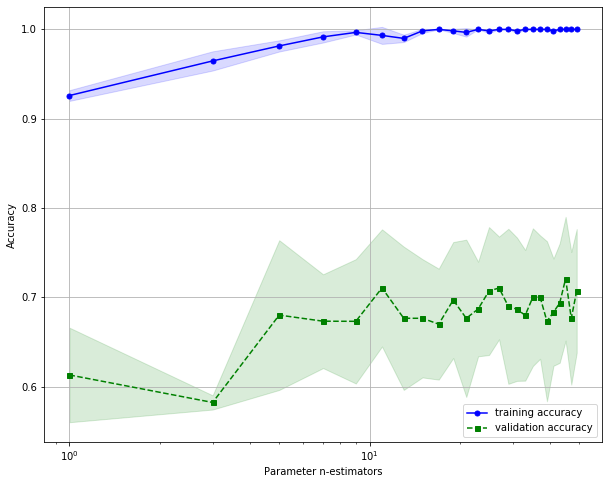

In [79]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name = 'n_estimators'
param_range = np.arange(1, 50, 2)
cv=3

train_scores, valid_scores = validation_curve(RFC, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                               cv=cv,
                                               scoring="accuracy", 
                                               n_jobs=-1
                                               )
train_scores
valid_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n-estimators')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


#### Cross-Validation

Точност-score RFC: 0.82
Прецизност RFC: 0.63
Чувствителност RFC: 0.57
F1 RFC: 0.60


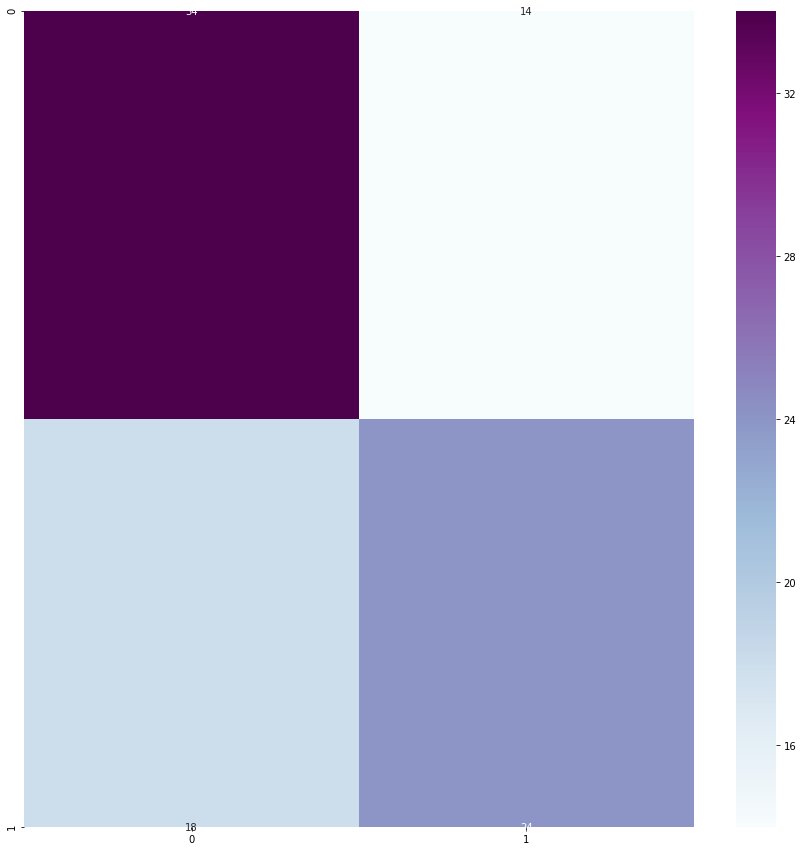

In [80]:
score_RFC = cross_val_score(RFC, X_train, y_train, cv=10)
score_RFC
print("Точност-score RFC: %0.2f" % (score_RFC.mean()))
y_RFC_pred = cross_val_predict(RFC, X_test, y_test, cv=10)
mRFC = confusion_matrix(y_test, y_RFC_pred)
sns.heatmap(mRFC, annot=True,cmap='BuPu')
preci_RFC = precision_score(y_test, y_RFC_pred)
print("Прецизност RFC: %0.2f" % preci_RFC)
sensi_RFC = recall_score(y_test, y_RFC_pred)
print("Чувствителност RFC: %0.2f" % sensi_RFC)
f1_RFC = f1_score(y_test, y_RFC_pred)
print("F1 RFC: %0.2f" % f1_RFC)
proba_RFC = cross_val_predict(RFC, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Learning Curve

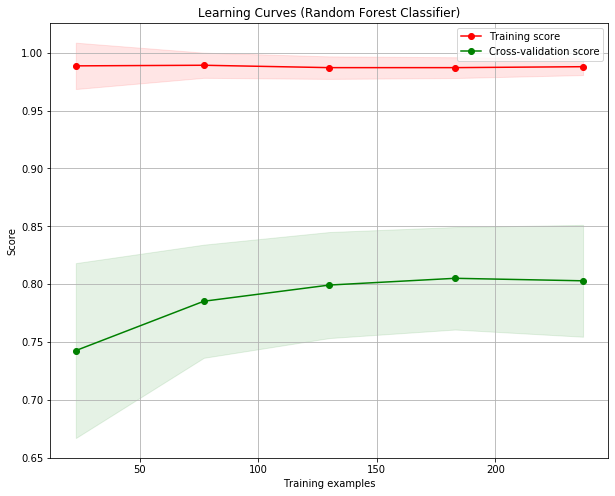

In [81]:
title = "Learning Curves (Random Forest Classifier)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RFC
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

#### ROC Curve

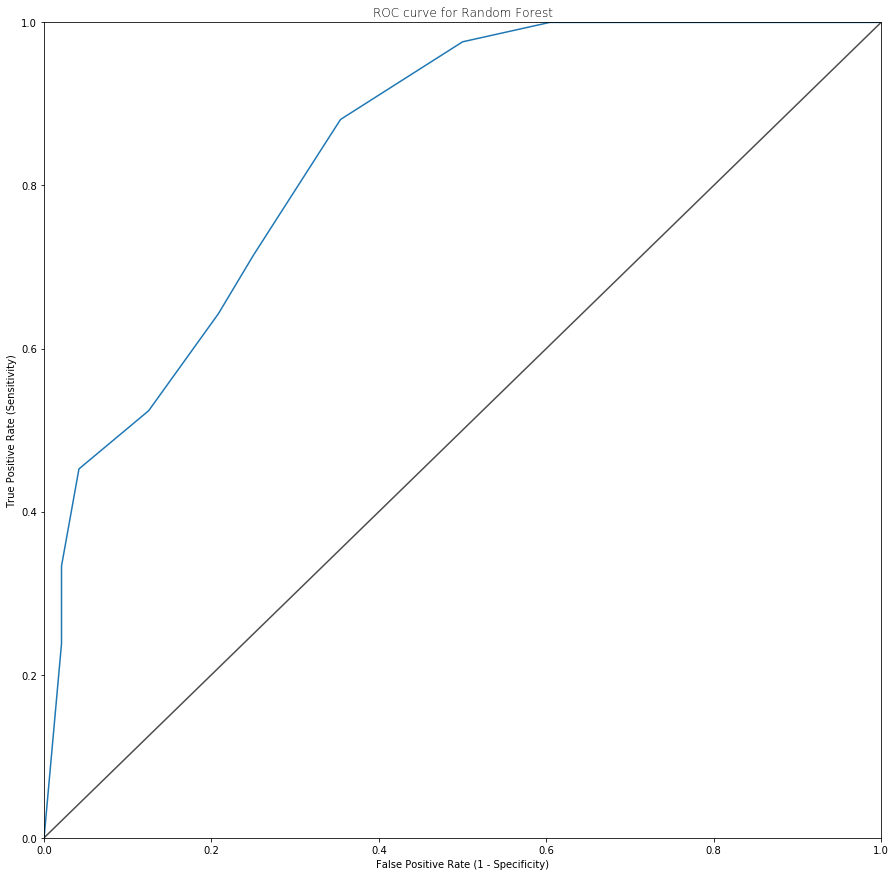

AUC Score : 0.8454861111111112


In [82]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_RFC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Random Forest', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_RFC = auc(fpr, tpr)
print("AUC Score :", auc_RFC)

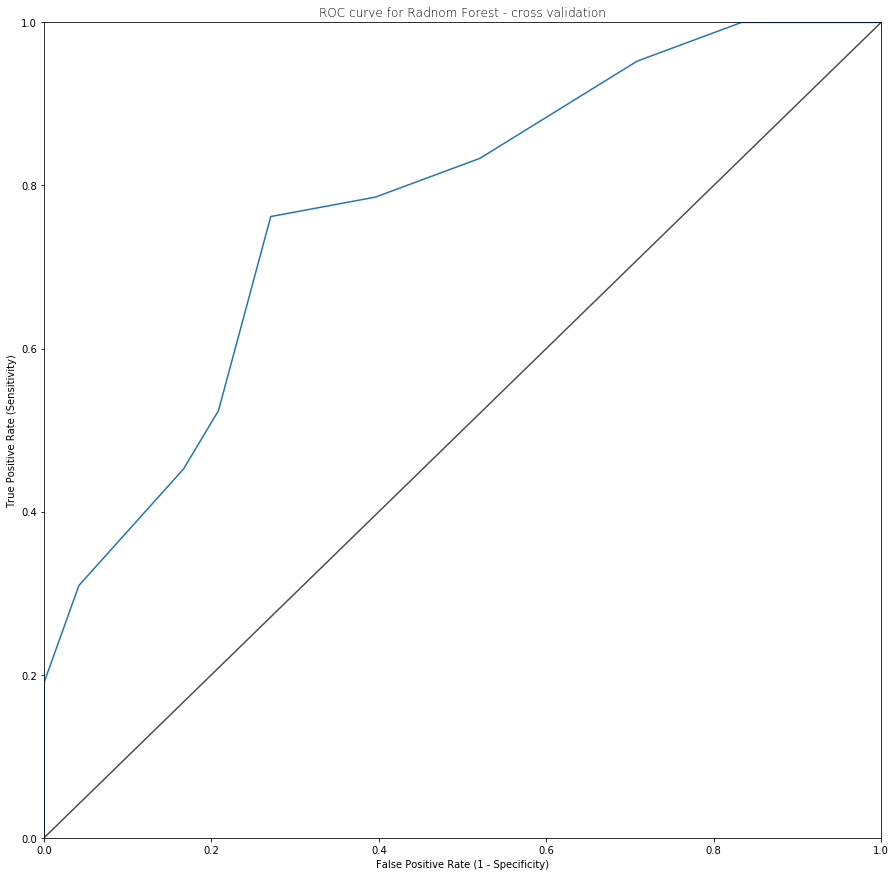

AUC Score : 0.7725694444444444


In [83]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_RFC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Radnom Forest - cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_RFC_score = auc(fpr, tpr)
print("AUC Score :", auc_RFC_score)

#### Model tunning

In [84]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,3,5,7],
            "n_estimators": [10,100,200,500,1000],
            "min_samples_split": [2,5,10]}

In [85]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [86]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 231 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 717 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1527 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2054 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  7.1min finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [87]:
print("Best Parameters: " + str(rf_cv_model.best_params_))

Best Parameters: {'max_depth': 2, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [137]:
rf_tuned = RandomForestClassifier(max_depth = 2, 
                                  max_features = 3, 
                                  min_samples_split = 2,
                                  n_estimators = 100)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [138]:
y_pred_rf_tuned = rf_tuned.predict(X_test)
y_pred_quant_rf_tuned = rf_tuned.predict_proba(X_test)[:, 1]

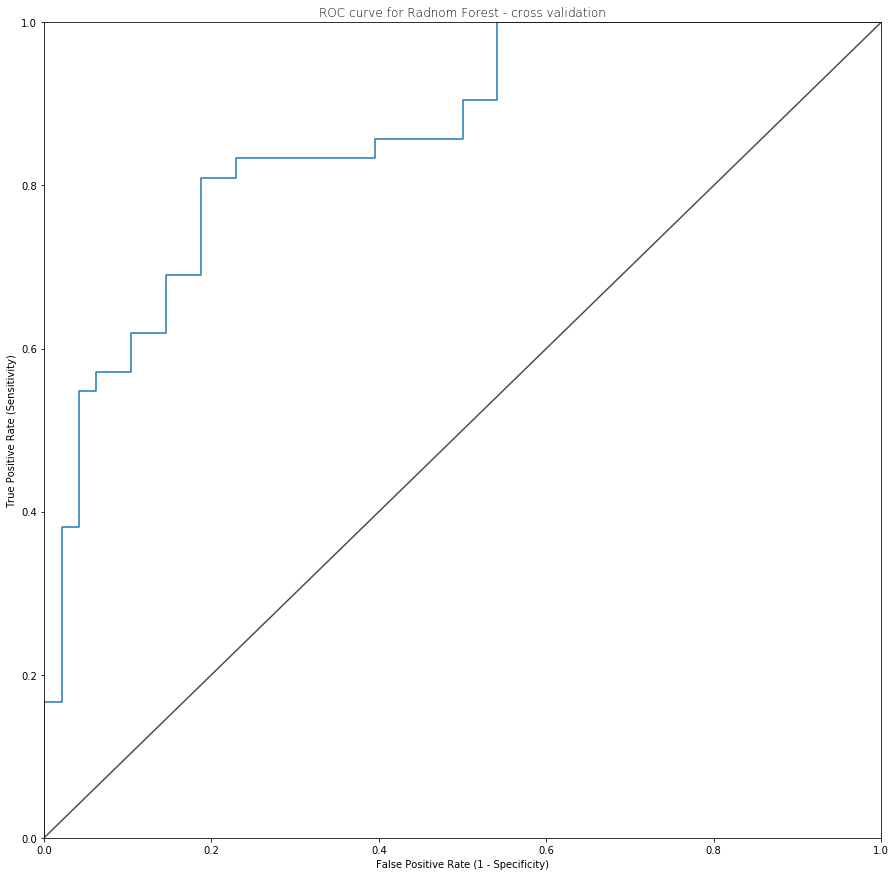

AUC Score : 0.8591269841269842


In [139]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred_quant_rf_tuned)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Radnom Forest - cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_RFC_tuned = auc(fpr, tpr)
print("AUC Score :", auc_RFC_tuned)

### Support Vector Machines

#### 1. RBF

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
SVC = SVC(probability=True, kernel="rbf")
model_SVC = SVC.fit(X_train,y_train)
prediction_SVC = model_SVC.predict(X_test)
y_pred_quant_SVC = model_SVC.predict_proba(X_test)[:, 1]

In [92]:
print(accuracy_score(y_test,prediction_SVC))
confusion_matrix(y_test, prediction_SVC)

0.8


array([[39,  9],
       [ 9, 33]], dtype=int64)

####  Validation Curve

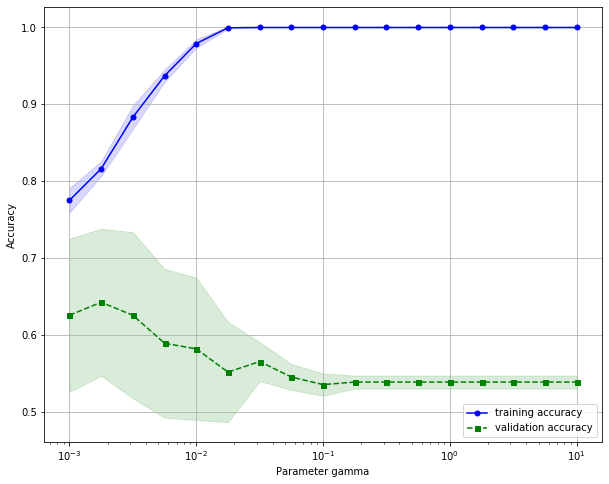

In [93]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name="gamma"
cv = StratifiedKFold(10)
param_range = np.logspace(-3, 1, 17)

train_scores, valid_scores = validation_curve(SVC, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                               cv=cv,
                                               scoring="accuracy", 
                                               n_jobs=8
                                               )
train_scores
valid_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter gamma')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


#### Cross validation

Точност-score RFC: 0.86
Прецизност SVC: 0.81
Чувствителност SVC: 0.62
F1 SVC: 0.70


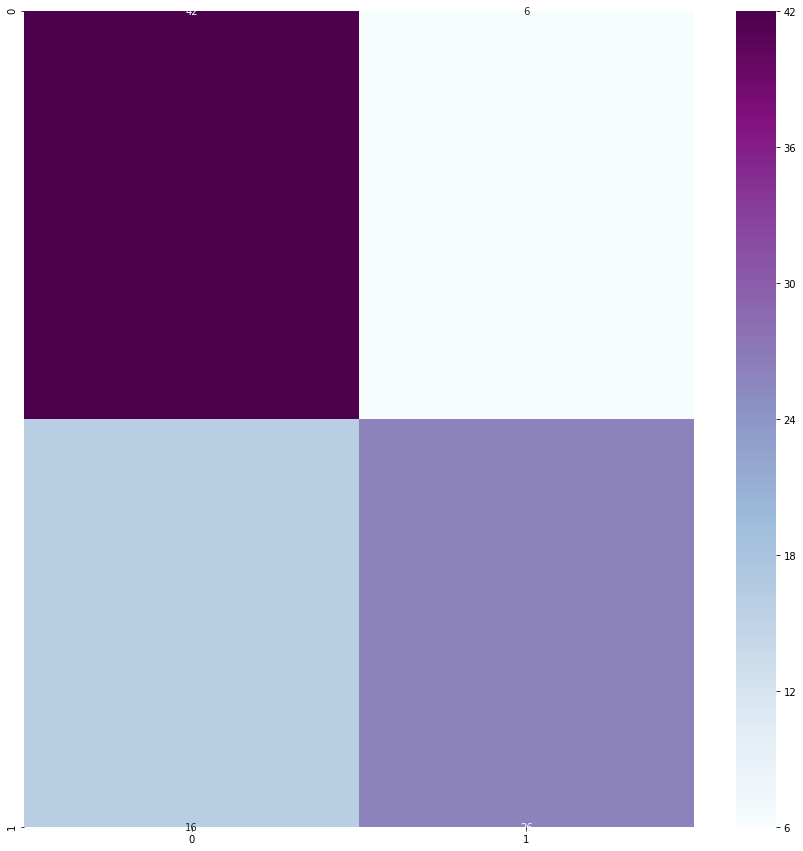

In [94]:
score_SVC = cross_val_score(SVC, X_train, y_train, cv=10)
print("Точност-score RFC: %0.2f" % (score_SVC.mean()))
y_SVC_pred = cross_val_predict(SVC, X_test, y_test, cv=10)
mSVC = confusion_matrix(y_test, y_SVC_pred)
sns.heatmap(mSVC, annot=True,cmap='BuPu')
preci_SVC = precision_score(y_test, y_SVC_pred)
print("Прецизност SVC: %0.2f" % preci_SVC)
sensi_SVC = recall_score(y_test, y_SVC_pred)
print("Чувствителност SVC: %0.2f" % sensi_SVC)
f1_SVC = f1_score(y_test, y_SVC_pred)
print("F1 SVC: %0.2f" % f1_SVC)
proba_SVC = cross_val_predict(SVC, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Learning Curve

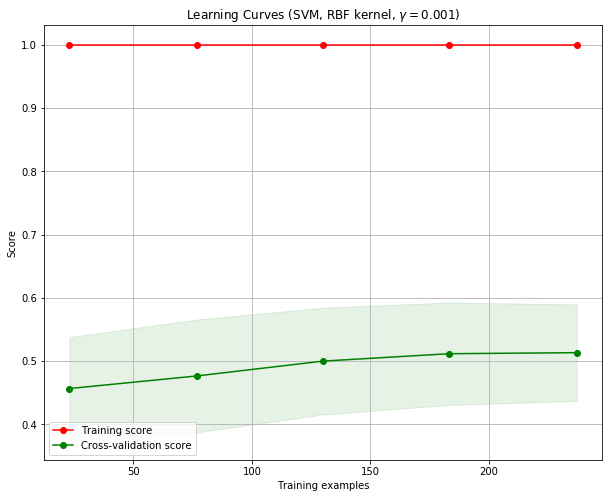

In [95]:
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC
plot_learning_curve(estimator, title, X, y,
                    cv=cv, n_jobs=4)

plt.show()

#### ROC Curve

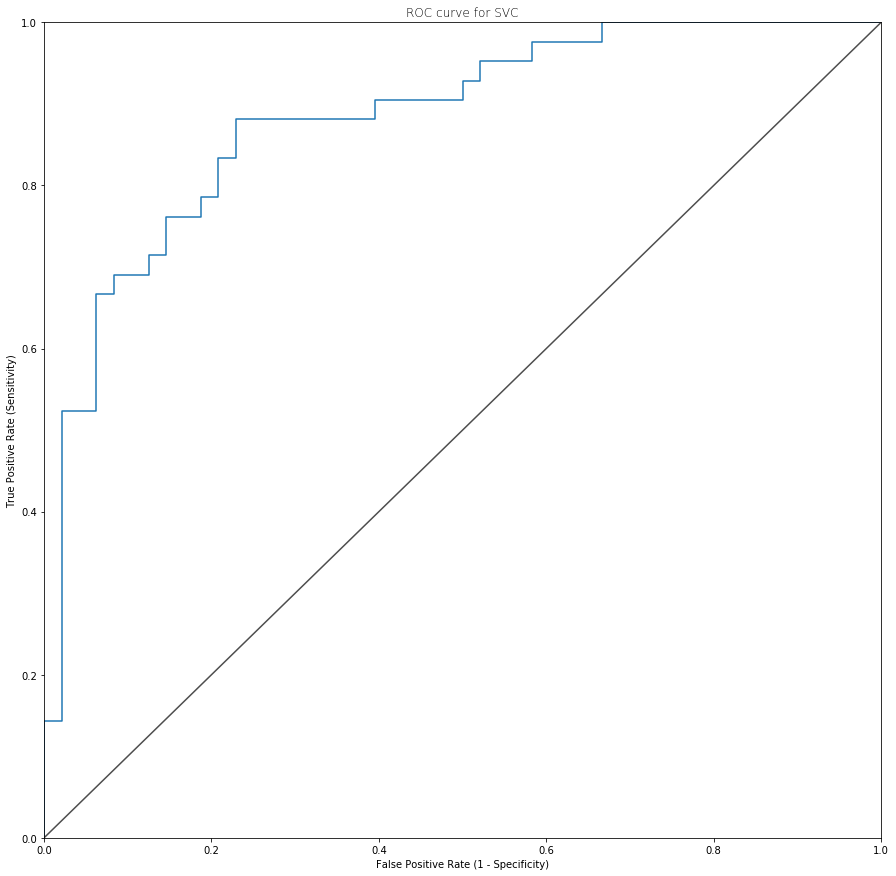

AUC Score : 0.8824404761904762


In [96]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_SVC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC = auc(fpr, tpr)
print("AUC Score :", auc_SVC)

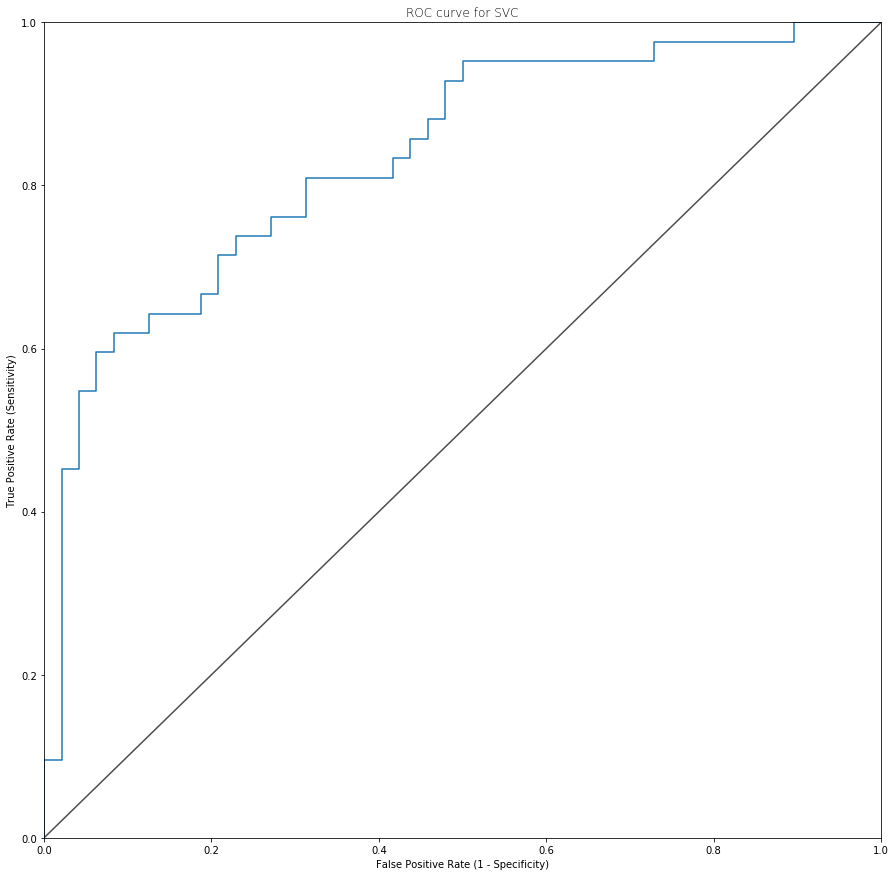

AUC Score : 0.8348214285714286


In [97]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,proba_SVC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_score = auc(fpr, tpr)
print("AUC Score :", auc_SVC_score)

#### Model tunning

In [98]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

svc_cv_model = GridSearchCV(SVC,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  80 | elapsed:    0.4s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.8s finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [99]:
print("Best parameters: " + str(svc_cv_model.best_params_))

Best parameters: {'C': 5}


In [100]:
from sklearn.svm import SVC
SVC1 = SVC(probability=True, kernel="rbf", C=5)
svc_tuned = SVC1.fit(X_train, y_train)

In [101]:
y_pred_svc = svc_tuned.predict(X_test)
y_pred_svc_tuned = svc_tuned.predict_proba(X_test)[:, 1]

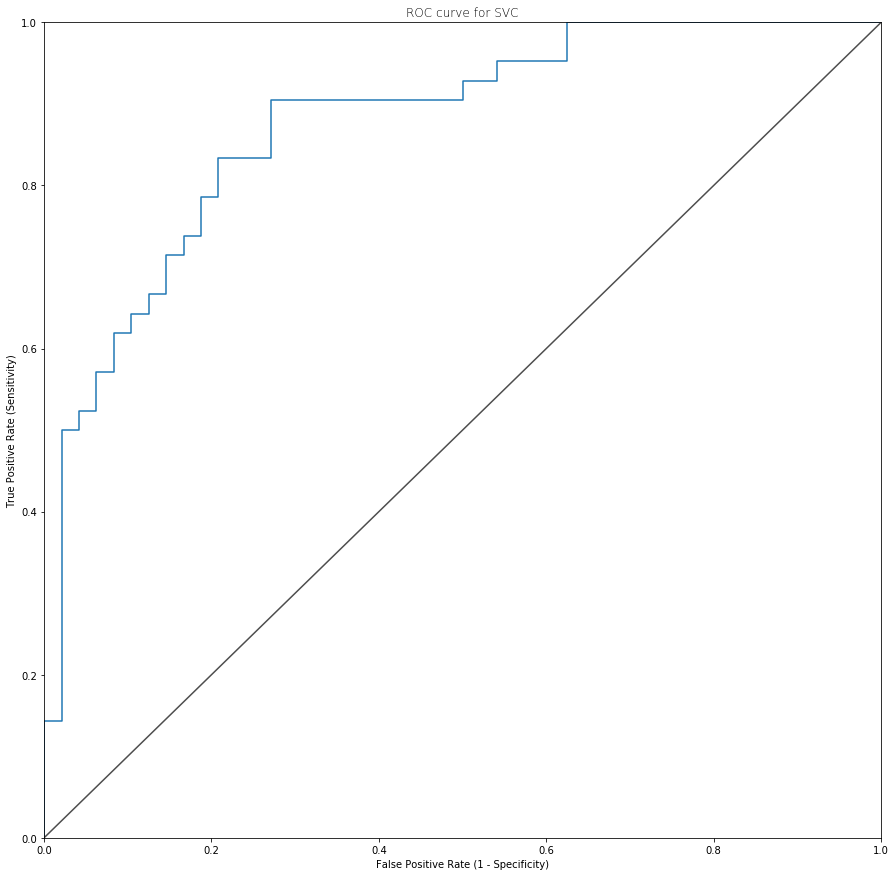

AUC Score : 0.8754960317460317


In [102]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred_svc_tuned)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_tuned = auc(fpr, tpr)
print("AUC Score :", auc_SVC_tuned)

#### 2. LINEAR

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
SVC_linear = SVC(probability=True, kernel="linear")
model_SVC_linear = SVC_linear.fit(X_train,y_train)
prediction_SVC_linear = model_SVC_linear.predict(X_test)
y_pred_quant_SVC_linear = model_SVC_linear.predict_proba(X_test)[:, 1]

In [104]:
print(accuracy_score(y_test,prediction_SVC_linear))
confusion_matrix(y_test, prediction_SVC_linear)

0.7666666666666667


array([[38, 10],
       [11, 31]], dtype=int64)

#### Validation Curve

In [105]:
# from sklearn.model_selection import validation_curve
# from sklearn.model_selection import StratifiedKFold


# param_name="gamma"
# cv = StratifiedKFold(10)
# param_range = np.logspace(-3, 1, 17)

# train_scores, valid_scores = validation_curve(SVC_linear, 
#                                                X, 
#                                                y, 
#                                                param_name,
#                                                param_range,
#                                                cv=cv,
#                                                scoring="accuracy", 
#                                                n_jobs=8
#                                                )
# train_scores
# valid_scores

# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)

# test_mean = np.mean(valid_scores, axis=1)
# test_std = np.std(valid_scores, axis=1)

# plt.figure(figsize=(10,8))
# plt.plot(param_range, train_mean,
#          color='blue', marker='o',
#          markersize=5, label='training accuracy')
# plt.fill_between(param_range, train_mean + train_std,
#                  train_mean - train_std, alpha=0.15,
#                  color='blue')
# plt.plot(param_range, test_mean,
#          color='green', linestyle='--',
#          marker='s', markersize=5,
#          label='validation accuracy')
# plt.fill_between(param_range,
#                  test_mean + test_std,
#                  test_mean - test_std,
#                  alpha=0.15, color='green')
# plt.grid()
# plt.xscale('log')
# plt.legend(loc='lower right')
# plt.xlabel('Parameter gamma')
# plt.ylabel('Accuracy')
# #plt.ylim([0.8, 1.0])
# plt.show()


#### Cross-validation

Точност-score RFC: 0.85
Прецизност SVC: 0.78
Чувствителност SVC: 0.76
F1 SVC: 0.77


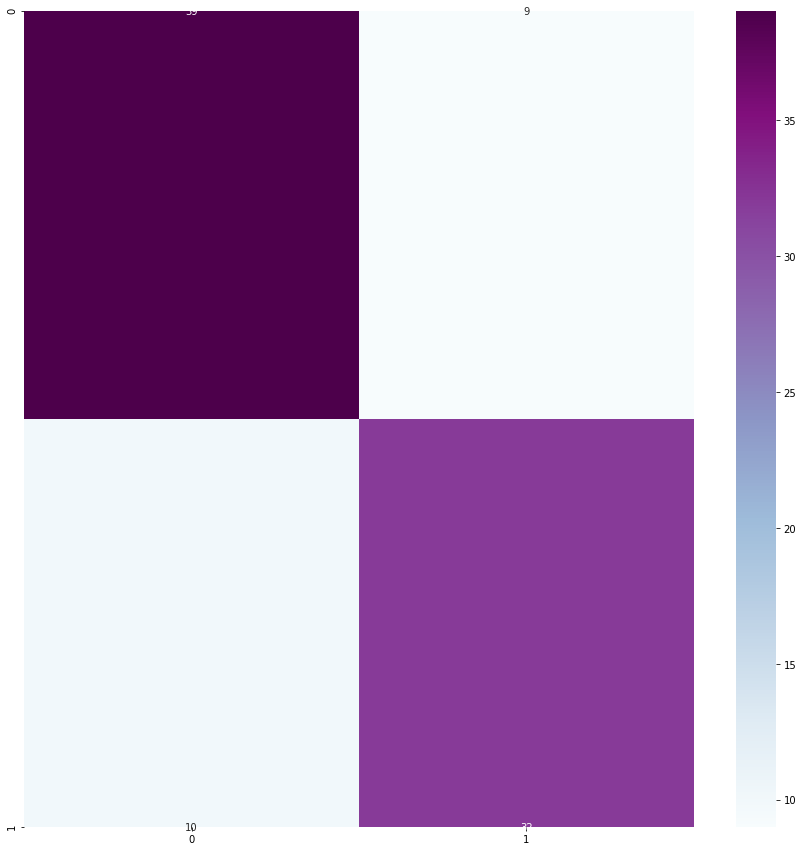

In [106]:
score_SVC_linear = cross_val_score(SVC_linear, X_train, y_train, cv=10)
print("Точност-score RFC: %0.2f" % (score_SVC_linear.mean()))
y_SVC_pred_linear = cross_val_predict(SVC_linear, X_test, y_test, cv=10)
mSVC = confusion_matrix(y_test, y_SVC_pred_linear)
sns.heatmap(mSVC, annot=True,cmap='BuPu')
preci_SVC = precision_score(y_test, y_SVC_pred_linear)
print("Прецизност SVC: %0.2f" % preci_SVC)
sensi_SVC = recall_score(y_test, y_SVC_pred_linear)
print("Чувствителност SVC: %0.2f" % sensi_SVC)
f1_SVC = f1_score(y_test, y_SVC_pred_linear)
print("F1 SVC: %0.2f" % f1_SVC)
proba_SVC_linear = cross_val_predict(SVC_linear, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Learning Curve

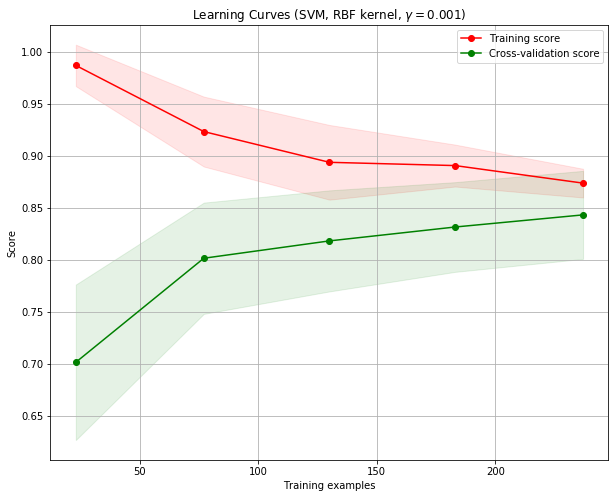

In [107]:
title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC_linear
plot_learning_curve(estimator, title, X, y,
                    cv=cv, n_jobs=4)

plt.show()

#### ROC curve

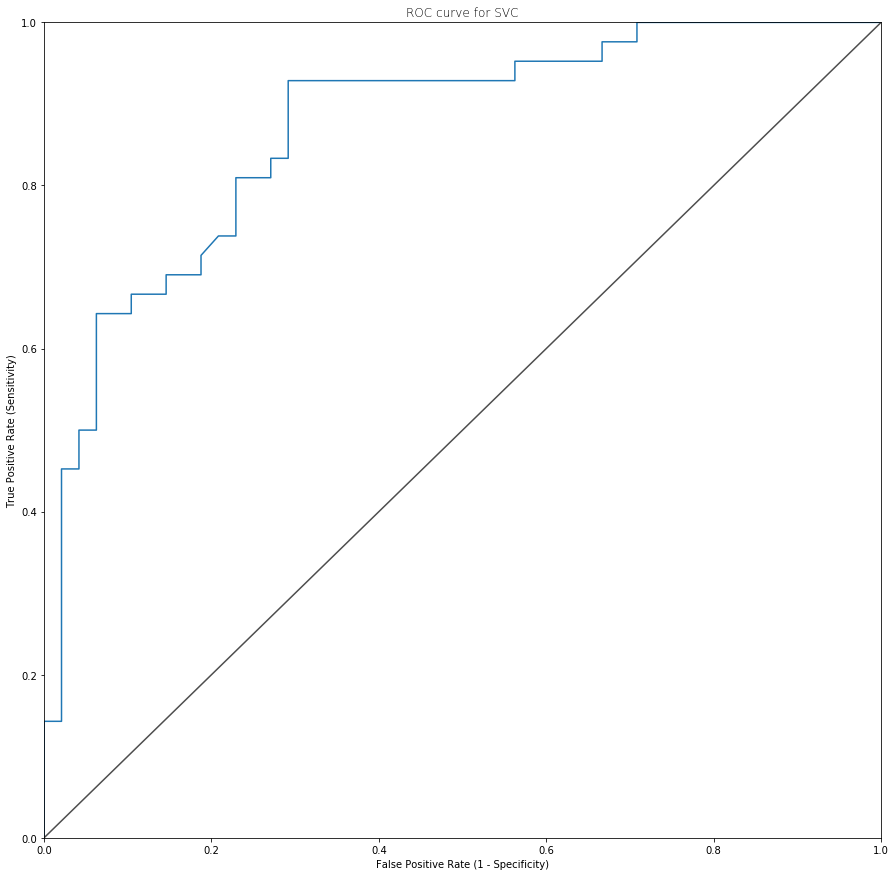

AUC Score : 0.8707837301587301


In [108]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_SVC_linear)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_linear = auc(fpr, tpr)
print("AUC Score :", auc_SVC_linear)

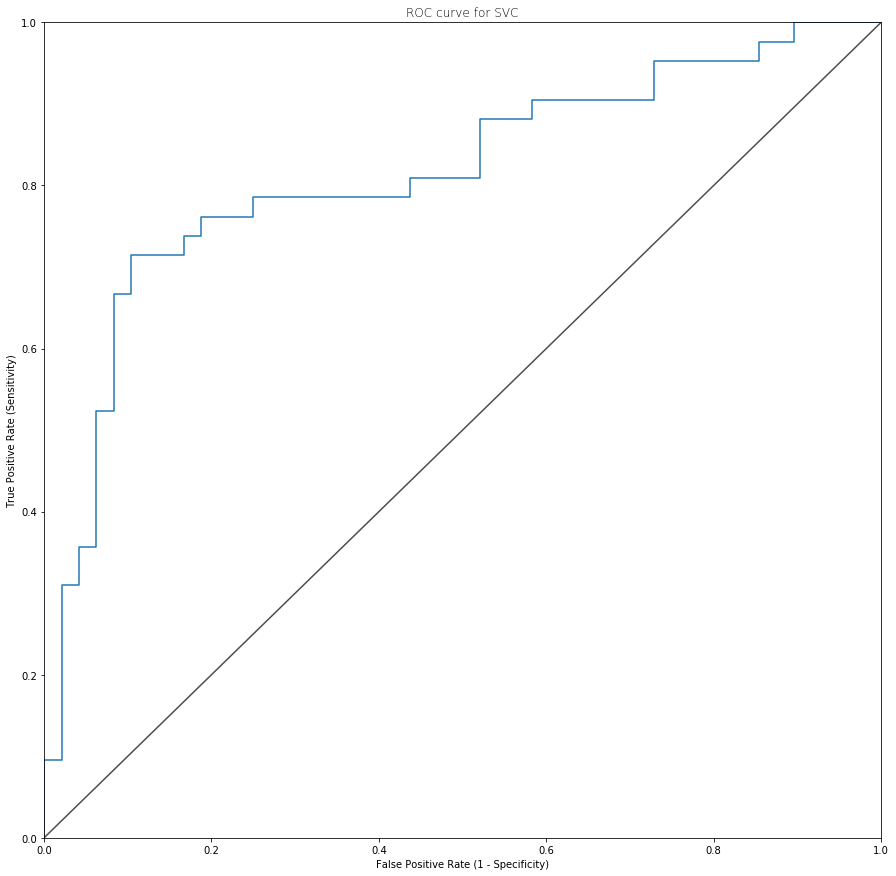

AUC Score : 0.8139880952380952


In [109]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_SVC_linear)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_linear_cross = auc(fpr, tpr)
print("AUC Score :", auc_SVC_linear_cross)

#### Model tuning

In [110]:
svc_params = {"C": [0.00001, 0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}
             
svc_cv_model = GridSearchCV(SVC_linear, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)
print("Best parameters: " + str(svc_cv_model.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best parameters: {'C': 0.1}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    2.5s finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [111]:
from sklearn.svm import SVC
svc_tuned_linear = SVC(probability=True,kernel = "linear", C = 0.1).fit(X_train, y_train)
y_pred_linear = svc_tuned_linear.predict(X_test)
y_pred_svc_linear_tuned = svc_tuned_linear.predict_proba(X_test)[:, 1]

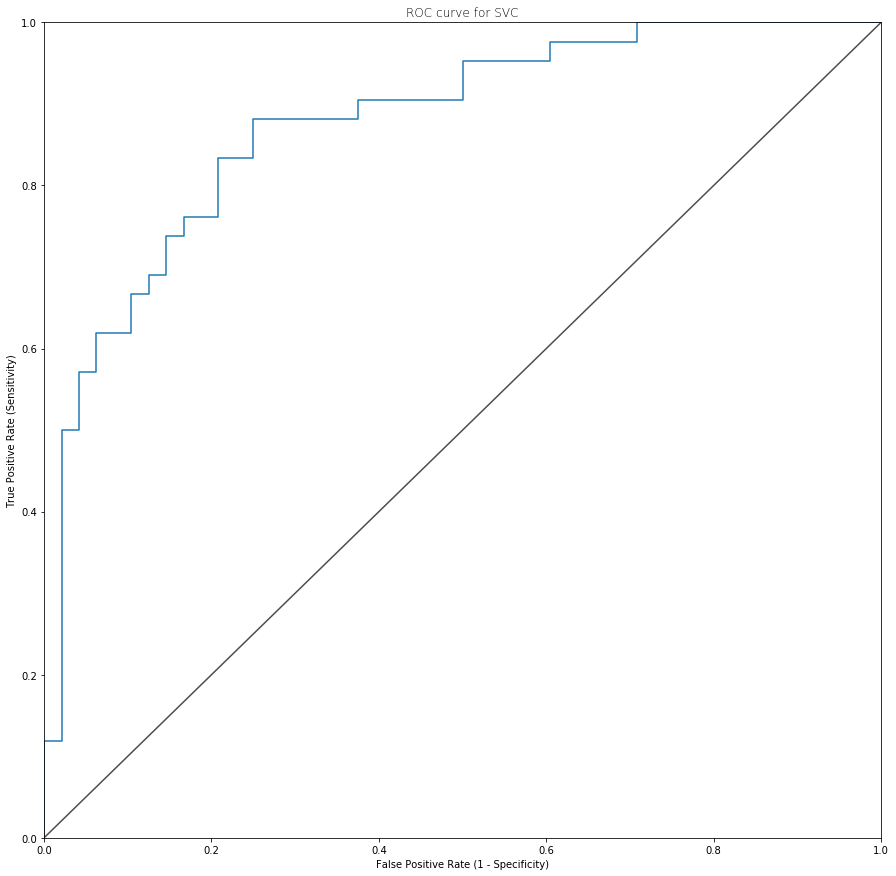

AUC Score : 0.8764880952380952


In [112]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc_linear_tuned)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_linear_tuned = auc(fpr, tpr)
print("AUC Score :", auc_SVC_linear_tuned)

#### 3. POLY

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
SVC_poly = SVC(probability=True, kernel="poly")
model_SVC_poly = SVC_poly.fit(X_train,y_train)
prediction_SVC_poly = model_SVC_poly.predict(X_test)
y_pred_quant_SVC_poly = model_SVC_poly.predict_proba(X_test)[:, 1]

In [114]:
print(accuracy_score(y_test,prediction_SVC_poly))
confusion_matrix(y_test, prediction_SVC_poly)

0.6


array([[47,  1],
       [35,  7]], dtype=int64)

#### Validation Curve

In [115]:
# # from sklearn.model_selection import validation_curve
# # from sklearn.model_selection import StratifiedKFold


# # param_name="gamma"
# cv = StratifiedKFold(10)
# param_range = np.logspace(-1, 1, 5)

# train_scores, valid_scores = validation_curve(SVC_poly, 
#                                                X, 
#                                                y, 
#                                                param_name,
#                                                param_range,
#                                                cv=cv,
#                                                scoring="accuracy", 
#                                                n_jobs=8
#                                                )
# train_scores
# valid_scores

# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)

# test_mean = np.mean(valid_scores, axis=1)
# test_std = np.std(valid_scores, axis=1)

# plt.figure(figsize=(10,8))
# plt.plot(param_range, train_mean,
#          color='blue', marker='o',
#          markersize=5, label='training accuracy')
# plt.fill_between(param_range, train_mean + train_std,
#                  train_mean - train_std, alpha=0.15,
#                  color='blue')
# plt.plot(param_range, test_mean,
#          color='green', linestyle='--',
#          marker='s', markersize=5,
#          label='validation accuracy')
# plt.fill_between(param_range,
#                  test_mean + test_std,
#                  test_mean - test_std,
#                  alpha=0.15, color='green')
# plt.grid()
# plt.xscale('log')
# plt.legend(loc='lower right')
# plt.xlabel('Parameter gamma')
# plt.ylabel('Accuracy')
# #plt.ylim([0.8, 1.0])
# plt.show()


#### Cross-validation

Точност-score RFC: 0.57
Прецизност SVC: 0.00
Чувствителност SVC: 0.00
F1 SVC: 0.00


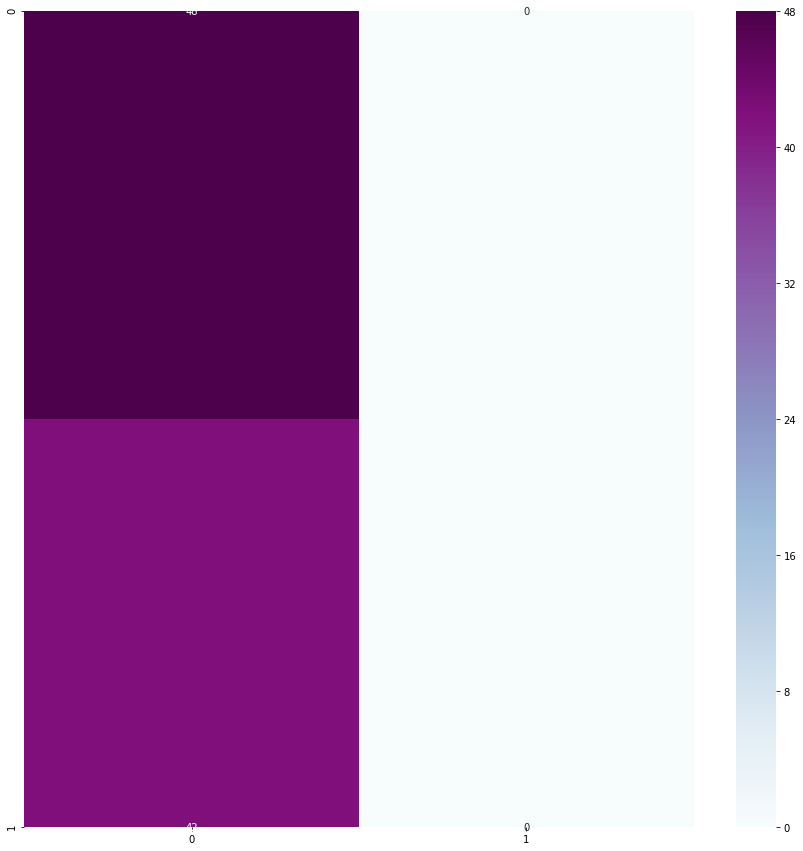

In [116]:
score_SVC_poly = cross_val_score(SVC_poly, X_train, y_train, cv=10)
print("Точност-score RFC: %0.2f" % (score_SVC_poly.mean()))
y_SVC_pred_poly = cross_val_predict(SVC_poly, X_test, y_test, cv=10)
mSVC = confusion_matrix(y_test, y_SVC_pred_poly)
sns.heatmap(mSVC, annot=True,cmap='BuPu')
preci_SVC = precision_score(y_test, y_SVC_pred_poly)
print("Прецизност SVC: %0.2f" % preci_SVC)
sensi_SVC = recall_score(y_test, y_SVC_pred_poly)
print("Чувствителност SVC: %0.2f" % sensi_SVC)
f1_SVC = f1_score(y_test, y_SVC_pred_poly)
print("F1 SVC: %0.2f" % f1_SVC)
proba_SVC_poly = cross_val_predict(SVC_poly, X_test, y_test, cv=10, method='predict_proba')[:, 1]

#### Learning Curve

In [117]:
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = SVC_poly(gamma = 0.001)
# plot_learning_curve(estimator, title, X, y,
#                     cv=cv, n_jobs=4)

# plt.show()

#### ROC curve

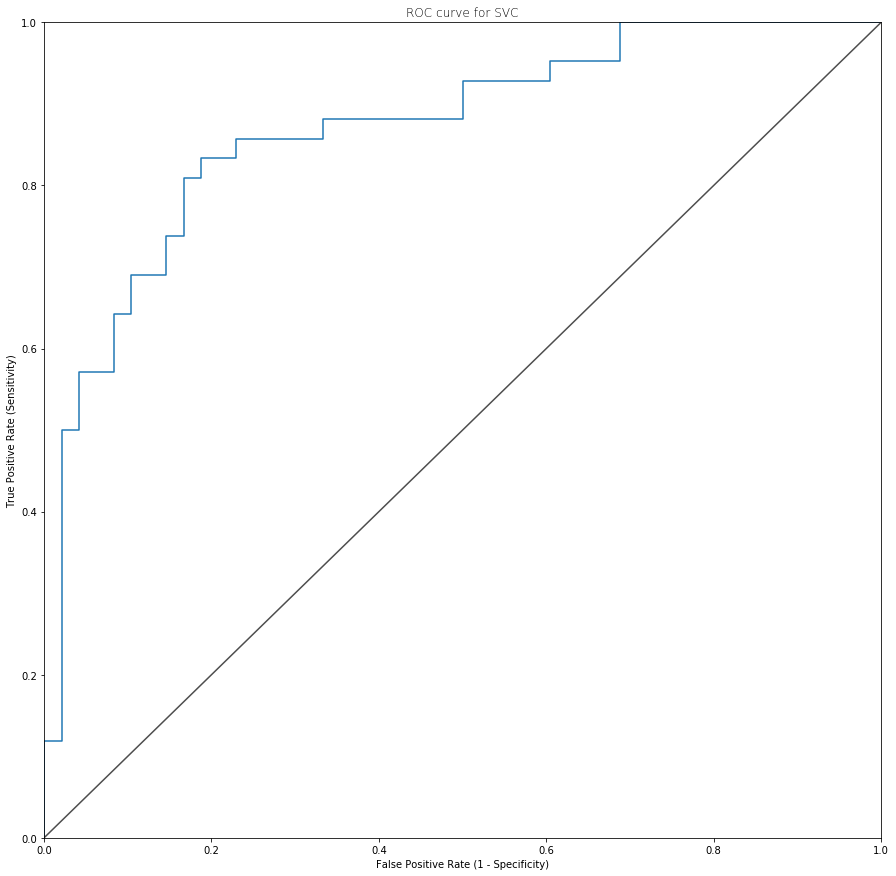

AUC Score : 0.8705357142857143


In [118]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_SVC_poly)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_poly = auc(fpr, tpr)
print("AUC Score :", auc_SVC_poly)

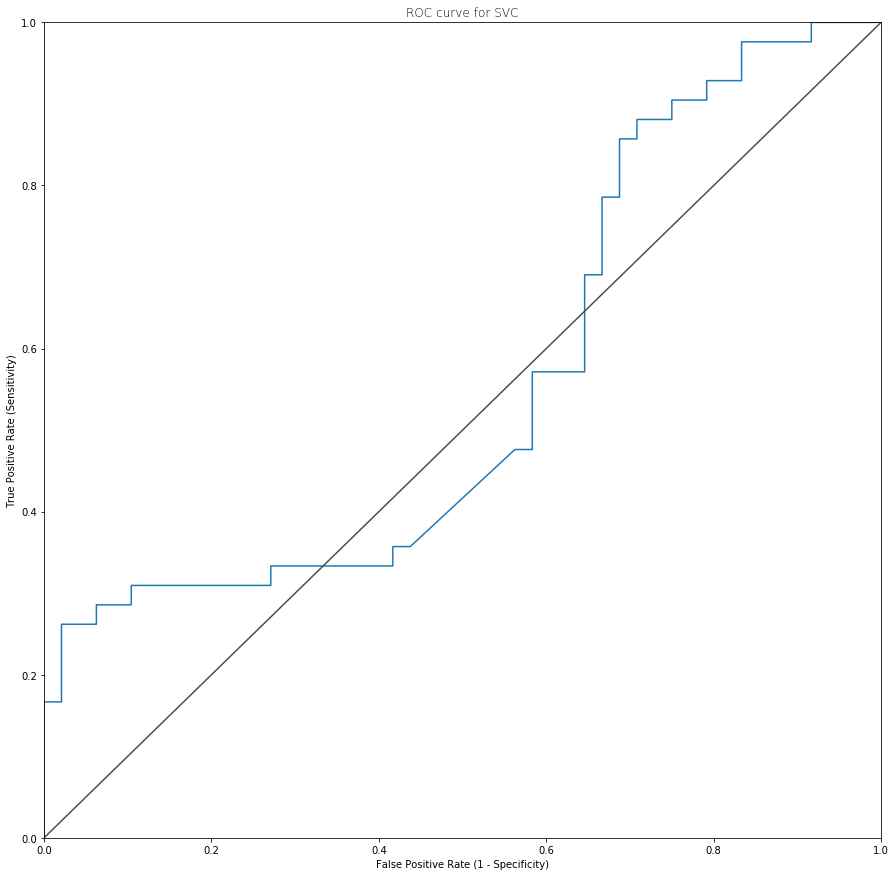

AUC Score : 0.5580357142857143


In [119]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_SVC_poly)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_poly_cross = auc(fpr, tpr)
print("AUC Score :", auc_SVC_poly_cross)

#### Model tuning

In [120]:
svc_params = {"C": [0.00001, 0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}
svc_cv_model = GridSearchCV(SVC_poly, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)
print("Best parameters: " + str(svc_cv_model.best_params_))

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    1.5s


Best parameters: {'C': 1e-05, 'gamma': 5}


[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    3.9s finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [121]:
from sklearn.svm import SVC
svc_tuned_poly = SVC(probability=True,kernel = "poly", C = 1e-05, gamma = 5).fit(X_train, y_train)
y_pred_poly = svc_tuned_poly.predict(X_test)
y_pred_svc_poly_tuned = svc_tuned_poly.predict_proba(X_test)[:, 1]

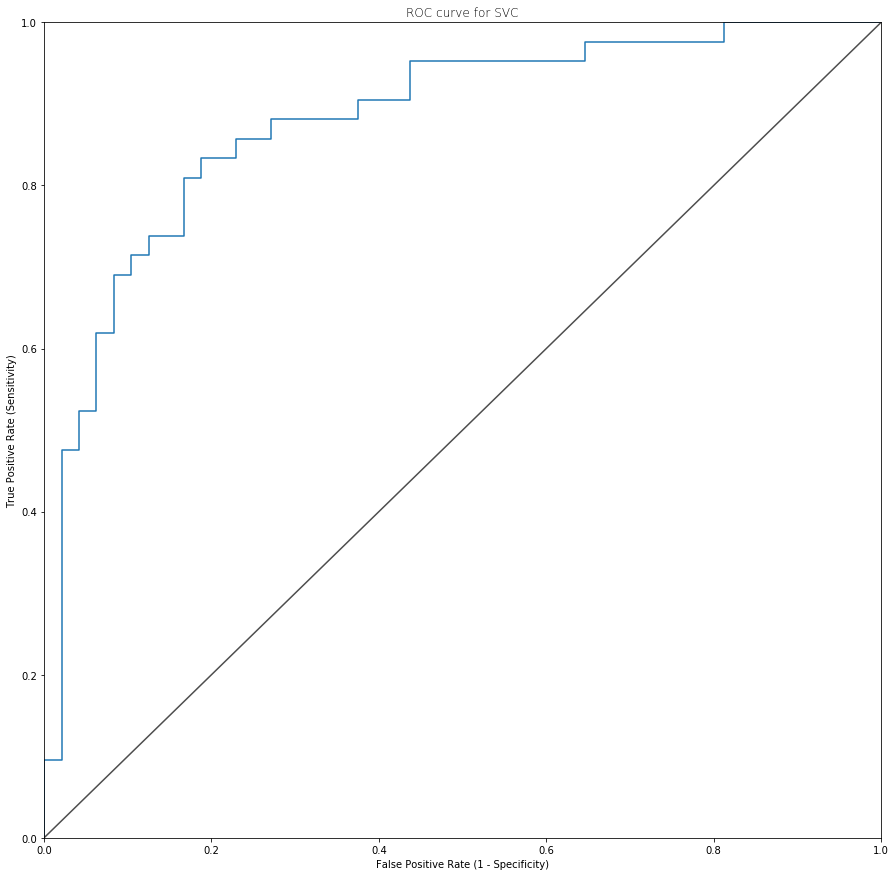

AUC Score : 0.8799603174603176


In [122]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc_poly_tuned)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_poly_tuned = auc(fpr, tpr)
print("AUC Score :", auc_SVC_poly_tuned)

### Компарација на резултати

In [140]:
X_final=["kNN", "NB", "LR", "DTC", "RFC", "SVC","SVC-Linear","SVC-Poly"]
y_final= [auc_kNN, auc_NB, auc_LR, auc_DTC, auc_RFC, auc_SVC, auc_SVC_linear, auc_SVC_poly]
print(auc_kNN, auc_NB, auc_LR, auc_DTC, auc_RFC, auc_SVC, auc_SVC_linear, auc_SVC_poly)

0.8645833333333333 0.8670634920634921 0.876984126984127 0.6741071428571429 0.8454861111111112 0.8824404761904762 0.8707837301587301 0.8705357142857143


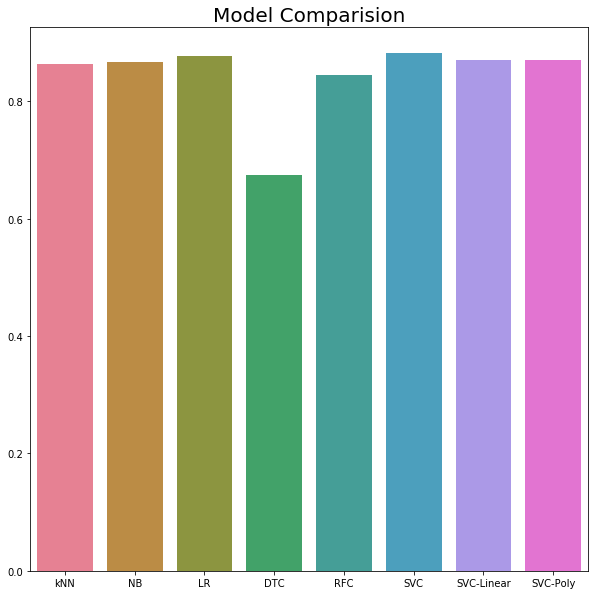

In [141]:
plt.figure(figsize=(10,10))
sns.barplot(x=X_final,y=y_final, palette='husl')
plt.xticks()
plt.title('Model Comparision',color = 'black',fontsize=20);

In [142]:
X_final_cross = ["kNN-crosval", "NB-crossval", "LR-crossval", "DTC-crossval", "RFC-crossval","SVC-crossval","SVC-Linear-crossval","SVC-poly-crossval"]
y_final_cross = [auc_kNN_score, auc_NB_score, auc_LR_score, auc_DTC_score, auc_RFC_score, auc_SVC_score, auc_SVC_linear_cross, auc_SVC_poly_cross]
print(auc_kNN_score,auc_NB_score,auc_LR_score,auc_DTC_score,auc_RFC_score,auc_SVC_score, auc_SVC_linear_cross, auc_SVC_poly_cross)

0.7653769841269842 0.7405753968253967 0.8407738095238095 0.6086309523809523 0.7725694444444444 0.8348214285714286 0.8139880952380952 0.5580357142857143


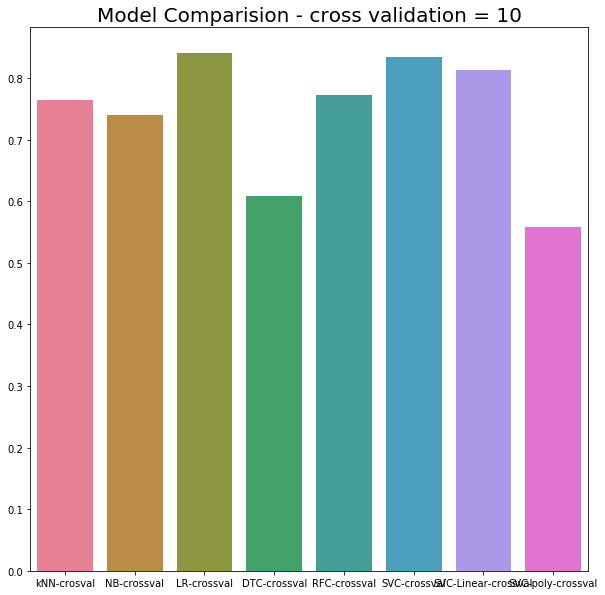

In [143]:
plt.figure(figsize=(10,10))
sns.barplot(x=X_final_cross,y=y_final_cross, palette='husl')
plt.xticks()
plt.title('Model Comparision - cross validation = 10',color = 'black',fontsize=20);

In [144]:
X_final_tuned = ["kNN-tuned", "NB-tuned", "LR-tuned", "DTC-tuned", "RFC-tuned", "SVC-tuned","SVC-tuned-linear","SVC-tuned-poly"]
y_final_tuned = [auc_kNN_tuned, auc_NB_tuned, auc_LR_tuned, auc_DTC_tuned, auc_RFC_tuned, auc_SVC_tuned, auc_SVC_linear_tuned,auc_SVC_poly_tuned]
print(auc_kNN_tuned,auc_NB_tuned,auc_LR_tuned,auc_DTC_tuned,auc_RFC_tuned,auc_SVC_tuned,auc_SVC_linear_tuned,auc_SVC_poly_tuned)

0.8670634920634921 0.8804563492063492 0.8809523809523809 0.6994047619047619 0.8591269841269842 0.8754960317460317 0.8764880952380952 0.8799603174603176


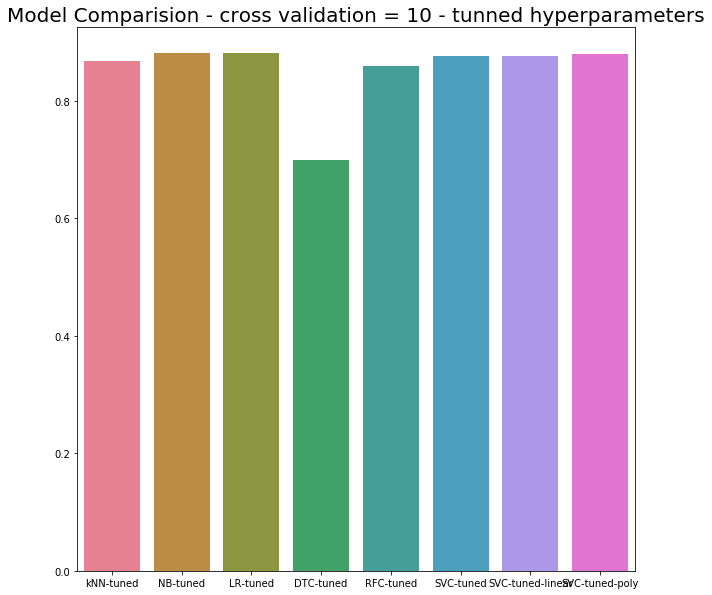

In [145]:
plt.figure(figsize=(10,10))
sns.barplot(x=X_final_tuned,y=y_final_tuned, palette='husl')
plt.xticks()
plt.title('Model Comparision - cross validation = 10 - tunned hyperparameters',color = 'black',fontsize=20);